In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rc('legend',fontsize=14)

## Nz's Covs

In [64]:
def make_sym(A):
    return np.maximum(A, A.transpose())

In [65]:
covs = np.load("../data/DESY1/Nzs/DESwl_final_HSC_covNzMarg_p5.0_diag4.0.npz")
s = sacc.Sacc().load_fits("../data/DESY1/Nzs/DESwl_final_HSC_cls_NzMarg_cov_p5.0_area2_diag4.0.fits")
z_DESwl__0_e = s.tracers["DESwl__0"].z
dndz_DESwl__0_e = (s.tracers["DESwl__0"].nz*np.mean(np.diff(s.tracers["DESwl__0"].z)))
z_DESwl__1_e = s.tracers["DESwl__1"].z
dndz_DESwl__1_e = (s.tracers["DESwl__1"].nz*np.mean(np.diff(s.tracers["DESwl__1"].z)))
z_DESwl__2_e = s.tracers["DESwl__2"].z
dndz_DESwl__2_e = (s.tracers["DESwl__2"].nz*np.mean(np.diff(s.tracers["DESwl__2"].z)))
z_DESwl__3_e = s.tracers["DESwl__3"].z
dndz_DESwl__3_e = (s.tracers["DESwl__3"].nz*np.mean(np.diff(s.tracers["DESwl__3"].z)))

nz_DESwl__0_e = (z_DESwl__0_e, dndz_DESwl__0_e)
nz_DESwl__1_e = (z_DESwl__1_e, dndz_DESwl__1_e)
nz_DESwl__2_e = (z_DESwl__2_e, dndz_DESwl__2_e)
nz_DESwl__3_e = (z_DESwl__3_e, dndz_DESwl__3_e)

In [66]:
nzs_covs = {"DESY1wl__0": make_sym(covs['cov_nz'][:100][:, :100]), 
            "DESY1wl__1": make_sym(covs['cov_nz'][100:200][:, 100:200]),
            "DESY1wl__2": make_sym(covs['cov_nz'][200:300][:, 200:300]),
            "DESY1wl__3": make_sym(covs['cov_nz'][300:400][:, 300:400])}

/tmp/ipykernel_194/95440055.py:7: RuntimeWarning: divide by zero encountered in log
  im = axis[i].imshow(np.log(abs(nzs_covs[cov])),


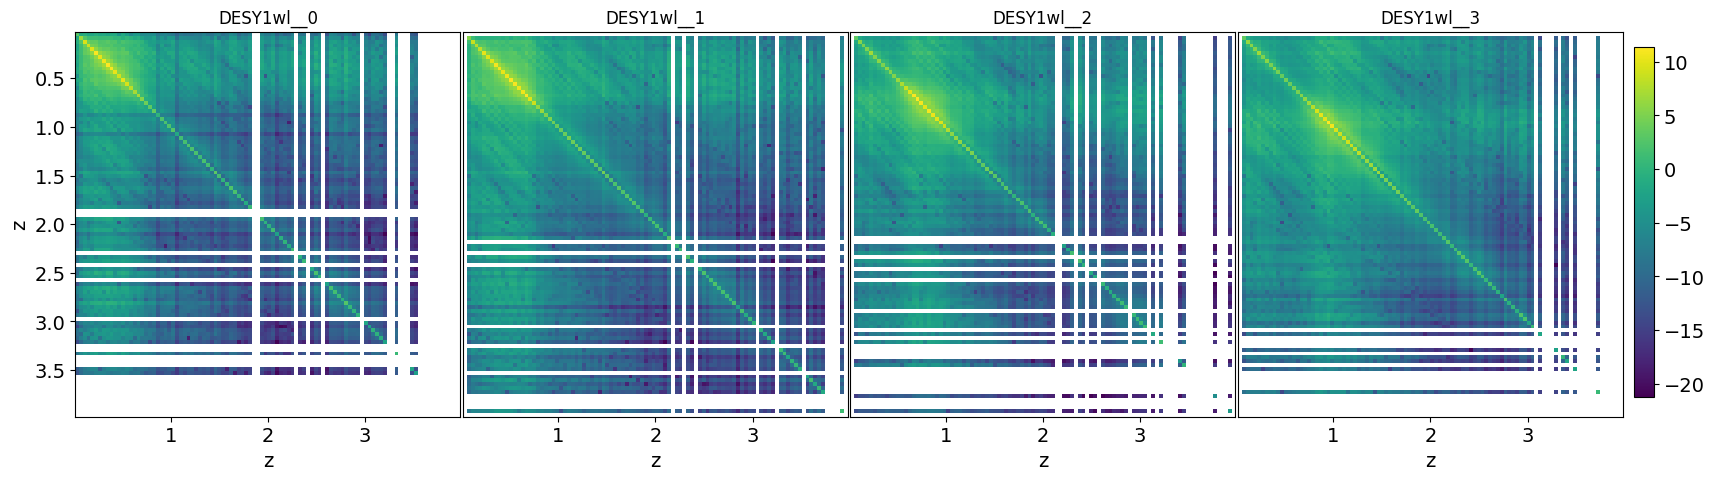

In [67]:
figure, axis = plt.subplots(1, 4, figsize=(20,5))
figure.subplots_adjust(wspace=0)
for i in range(0, len(nzs_covs.keys())):
    cov = list(nzs_covs.keys())[i]
    z = nz_DESwl__0_e[0]
    zmin, zmax = z[0], z[99]
    im = axis[i].imshow(np.log(abs(nzs_covs[cov])),
                        extent=[zmin, zmax, zmax, zmin])
    axis[i].set_title(cov)
    if i > 0:
        axis[i].set_yticks([])
    else:
        axis[i].set_ylabel("z")
    axis[i].set_xlabel("z")
cbar_ax = figure.add_axes([0.905, 0.15, 0.01, 0.7])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)

In [68]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [69]:
is_pos_def(nzs_covs["DESY1wl__0"])

False

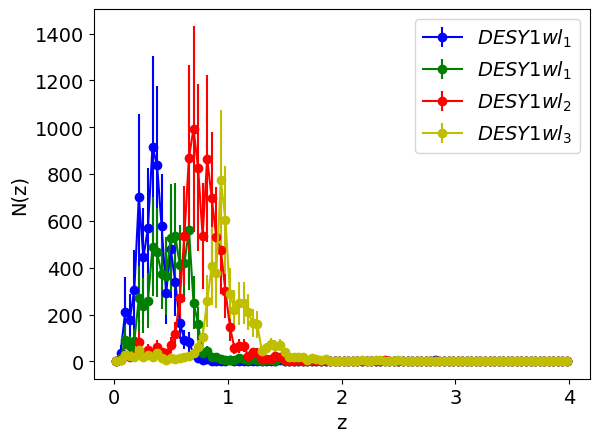

In [70]:
plt.errorbar(nz_DESwl__0_e[0], nz_DESwl__0_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__0"])),
             fmt='bo-', label="$DESY1wl_1$")

plt.errorbar(nz_DESwl__1_e[0], nz_DESwl__1_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__1"])),
             fmt='go-', label="$DESY1wl_1$")

plt.errorbar(nz_DESwl__2_e[0],  nz_DESwl__2_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__2"])),
             fmt='ro-', label="$DESY1wl_2$")

plt.errorbar(nz_DESwl__3_e[0], nz_DESwl__3_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__3"])),
             fmt='yo-', label="$DESY1wl_3$")

plt.xlabel("z")
plt.ylabel("N(z)")
plt.legend();

plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/binned_covs.pdf', bbox_inches='tight',  pad_inches=0)

In [71]:
np.savez("../data/DESY1/Nzs/nz_DESwl__0_e.npz",
         z=nz_DESwl__0_e[0], dndz=nz_DESwl__0_e[1], cov=nzs_covs["DESY1wl__0"])

np.savez("../data/DESY1/Nzs/nz_DESwl__1_e.npz",
         z=nz_DESwl__1_e[0], dndz=nz_DESwl__1_e[1], cov=nzs_covs["DESY1wl__1"])
np.savez("../data/DESY1/Nzs/nz_DESwl__2_e.npz",
         z=nz_DESwl__2_e[0], dndz=nz_DESwl__2_e[1], cov=nzs_covs["DESY1wl__2"])

np.savez("../data/DESY1/Nzs/nz_DESwl__3_e.npz",
         z=nz_DESwl__3_e[0], dndz=nz_DESwl__3_e[1], cov=nzs_covs["DESY1wl__3"])

### Binning

In [72]:
norm_0 = np.sum(dndz_DESwl__0_e)
norm_1 = np.sum(dndz_DESwl__1_e)
norm_2 = np.sum(dndz_DESwl__2_e)
norm_3 = np.sum(dndz_DESwl__3_e)

nz_DESwl__0_e = (z_DESwl__0_e[0:40], (dndz_DESwl__0_e/norm_0)[0:40])
nz_DESwl__1_e = (z_DESwl__1_e[1:41], (dndz_DESwl__1_e/norm_1)[1:41])
nz_DESwl__2_e = (z_DESwl__2_e[1:41], (dndz_DESwl__2_e/norm_2)[1:41])
nz_DESwl__3_e = (z_DESwl__3_e[1:41], (dndz_DESwl__3_e/norm_3)[1:41])

nzs_covs = {"DESY1wl__0": make_sym(covs['cov_nz'][:100][:, :100][:40][:,:40]/norm_0**2), 
            "DESY1wl__1": make_sym(covs['cov_nz'][100:200][:, 100:200][1:41][:,1:41]/norm_1**2),
            "DESY1wl__2": make_sym(covs['cov_nz'][200:300][:, 200:300][1:41][:,1:41]/norm_2**2),
            "DESY1wl__3": make_sym(covs['cov_nz'][300:400][:, 300:400][1:41][:,1:41]/norm_3**2)}

In [73]:
m = 40
#zs_k0_bins = np.mean(nz_DESwl__0_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k1_bins = np.mean(nz_DESwl__1_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k2_bins = np.mean(nz_DESwl__2_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k3_bins = np.mean(nz_DESwl__3_e[0][:m].reshape(m_bins, m // m_bins),1)

#nz_k0_bins = np.mean(nz_DESwl__0_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k1_bins = np.mean(nz_DESwl__1_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k2_bins = np.mean(nz_DESwl__2_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k3_bins = np.mean(nz_DESwl__3_e[1][:m].reshape(m_bins, m // m_bins),1)

#cov_k0_bins = (m_bins/m)*nzs_covs["DESY1wl__0"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k1_bins = (m_bins/m)*nzs_covs["DESY1wl__1"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k2_bins = (m_bins/m)*nzs_covs["DESY1wl__2"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k3_bins = (m_bins/m)*nzs_covs["DESY1wl__3"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)

#corr_k0_bins = cov_k0_bins / np.outer(np.sqrt(np.diag(cov_k0_bins)), np.sqrt(np.diag(cov_k0_bins)))
#corr_k1_bins = cov_k1_bins / np.outer(np.sqrt(np.diag(cov_k1_bins)), np.sqrt(np.diag(cov_k1_bins)))
#corr_k2_bins = cov_k2_bins / np.outer(np.sqrt(np.diag(cov_k2_bins)), np.sqrt(np.diag(cov_k2_bins)))
#corr_k3_bins = cov_k3_bins / np.outer(np.sqrt(np.diag(cov_k3_bins)), np.sqrt(np.diag(cov_k3_bins)))


if os.path.isdir("../data/DESY1/binned_{}_nzs".format(m))==False:
    os.mkdir("../data/DESY1/binned_{}_nzs".format(m))

np.savez("../data/DESY1/binned_{}_nzs/nz_DESwl__0_e.npz".format(m),
         z=nz_DESwl__0_e[0], dndz=nz_DESwl__0_e[1], cov=nzs_covs["DESY1wl__0"])
np.savez("../data/DESY1/binned_{}_nzs/nz_DESwl__1_e.npz".format(m),
         z=nz_DESwl__1_e[0], dndz=nz_DESwl__1_e[1], cov=nzs_covs["DESY1wl__1"])
np.savez("../data/DESY1/binned_{}_nzs/nz_DESwl__2_e.npz".format(m),
         z=nz_DESwl__2_e[0], dndz=nz_DESwl__2_e[1], cov=nzs_covs["DESY1wl__2"])
np.savez("../data/DESY1/binned_{}_nzs/nz_DESwl__3_e.npz".format(m),
         z=nz_DESwl__3_e[0], dndz=nz_DESwl__3_e[1], cov=nzs_covs["DESY1wl__3"])

In [74]:
nzs = {"DESY1wl__0": np.load("../data/DESY1/binned_40_nzs/nz_DESwl__0_e.npz"), 
       "DESY1wl__1": np.load("../data/DESY1/binned_40_nzs/nz_DESwl__1_e.npz"),
        "DESY1wl__2": np.load("../data/DESY1/binned_40_nzs/nz_DESwl__2_e.npz"),
        "DESY1wl__3": np.load("../data/DESY1/binned_40_nzs/nz_DESwl__3_e.npz")}

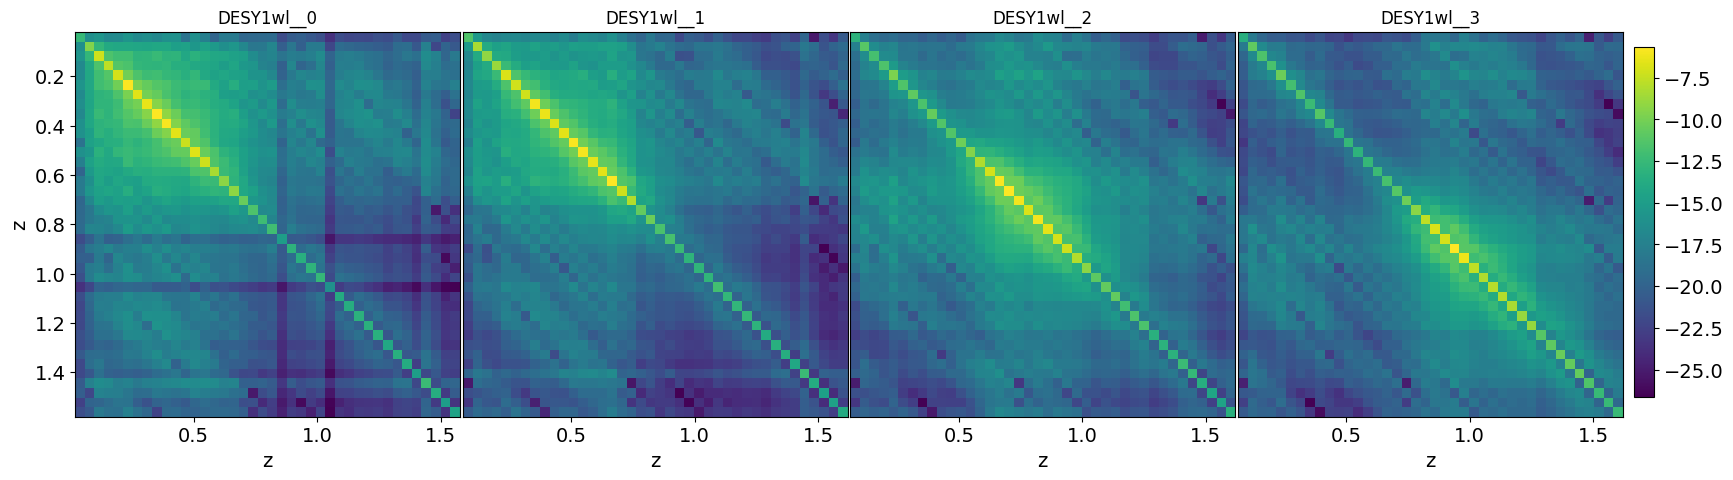

In [75]:
figure, axis = plt.subplots(1, 4, figsize=(20,5))
figure.subplots_adjust(wspace=0)
for i in range(0, len(nzs_covs.keys())):
    cov = list(nzs_covs.keys())[i]
    z = nzs[cov]["z"]
    im = axis[i].imshow(np.log(abs(nzs[cov]["cov"])), extent=[min(z), max(z), max(z), min(z)])
    axis[i].set_title(cov)
    if i > 0:
        axis[i].set_yticks([])
    else:
        axis[i].set_ylabel("z")
    axis[i].set_xlabel("z")
cbar_ax = figure.add_axes([0.905, 0.15, 0.01, 0.7])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)

In [76]:
is_pos_def(nzs_covs["DESY1wl__0"])

True

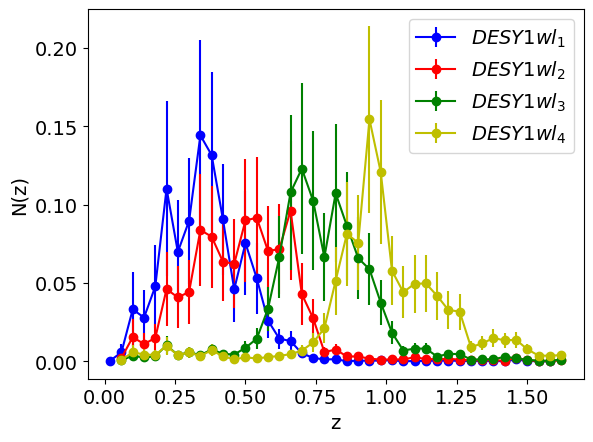

In [77]:
plt.errorbar(nzs["DESY1wl__0"]['z'], nzs["DESY1wl__0"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__0"]["cov"])), fmt='bo-', label="$DESY1wl_1$")
plt.errorbar(nzs["DESY1wl__1"]['z'], nzs["DESY1wl__1"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__1"]["cov"])), fmt='ro-', label="$DESY1wl_2$")
plt.errorbar(nzs["DESY1wl__2"]['z'], nzs["DESY1wl__2"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__2"]["cov"])), fmt='go-', label="$DESY1wl_3$")
plt.errorbar(nzs["DESY1wl__3"]['z'], nzs["DESY1wl__3"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__3"]["cov"])), fmt='yo-', label="$DESY1wl_4$")
plt.xlabel("z")
plt.ylabel("N(z)")
plt.legend();

plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/binned_covs.pdf', bbox_inches='tight',  pad_inches=0)

## Chains

In [5]:
chain_1 = np.loadtxt("../chains/carlos_chains/cl_cross_corr_v3_DES_2/2021-05-28_10000000__1.txt")
chain_2 = np.loadtxt("../chains/carlos_chains/cl_cross_corr_v3_DES_2/2021-05-28_10000000__2.txt")
chain_3 = np.loadtxt("../chains/carlos_chains/cl_cross_corr_v3_DES_2/2021-05-28_10000000__3.txt")
chain_4 = np.loadtxt("../chains/carlos_chains/cl_cross_corr_v3_DES_2/2021-05-28_10000000__4.txt")
chain_5 = np.loadtxt("../chains/carlos_chains/cl_cross_corr_v3_DES_2/2021-05-28_10000000__5.txt")
chain = np.concatenate([chain_1, chain_2, chain_3, chain_4, chain_5])
DES_ref = {'h': chain[:, 6],
           'Ωm': chain[:, 28],
           'Ωb': chain[:, 2],
           'ns': chain[:, 5],
           's8': chain[:, 27],
           'A_IA': chain[:, 17],
           'alpha_IA': chain[:, 18],
           'DESgc__0_0_dz': chain[:, 12],
           'DESgc__1_0_dz': chain[:, 13],
           'DESgc__2_0_dz': chain[:, 14],
           'DESgc__3_0_dz': chain[:, 15],
           'DESgc__4_0_dz': chain[:, 16],
           'DESwl__0_e_dz': chain[:, 23],
           'DESwl__1_e_dz': chain[:, 24],
           'DESwl__2_e_dz': chain[:, 25],
           'DESwl__3_e_dz': chain[:, 26],
           'DESgc__0_0_b': chain[:, 7],
           'DESgc__1_0_b': chain[:, 8],
           'DESgc__2_0_b': chain[:, 9],
           'DESgc__3_0_b': chain[:, 10],
           'DESgc__4_0_b': chain[:, 11],
           'DESwl__0_e_m': chain[:, 19],
           'DESwl__1_e_m': chain[:, 20],
           'DESwl__2_e_m': chain[:, 21], 
           'DESwl__3_e_m': chain[:, 22]}

In [6]:
path = "../chains/carlos_chains/cl_cross_corr_v3_DES_K1000_all_binning_softer_2_mag_correctMag/"
chain_1 = np.loadtxt(path+"/2021-06-07_10000000__1.txt")
chain_2 = np.loadtxt(path+"/2021-06-07_10000000__2.txt")
chain_3 = np.loadtxt(path+"/2021-06-07_10000000__3.txt")
chain_4 = np.loadtxt(path+"/2021-06-07_10000000__4.txt")
chain_5 = np.loadtxt(path+"/2021-06-07_10000000__5.txt")
chain_6 = np.loadtxt(path+"/2021-06-07_10000000__6.txt")
chain_7 = np.loadtxt(path+"/2021-06-07_10000000__7.txt")
chain_8 = np.loadtxt(path+"/2021-06-07_10000000__8.txt")
                    
chain = np.concatenate([chain_1, chain_2, chain_3, chain_4,
                        chain_5, chain_6, chain_7, chain_8])
FD_splines = {'h': chain[:, 9],
           'Ωm': chain[:, 51],
           'Ωb': chain[:, 6],
           'ns': chain[:, 8],
           's8': chain[:, 50],
           'A_IA': chain[:, 20],
           'alpha_IA': chain[:, 21],
           'DESgc__0_0_dz': chain[:, 15],
           'DESgc__1_0_dz': chain[:, 16],
           'DESgc__2_0_dz': chain[:, 17],
           'DESgc__3_0_dz': chain[:, 18],
           'DESgc__4_0_dz': chain[:, 19],
           'DESwl__0_e_dz': chain[:, 26],
           'DESwl__1_e_dz': chain[:, 27],
           'DESwl__2_e_dz': chain[:, 28],
           'DESwl__3_e_dz': chain[:, 29],
           'DESgc__0_0_b': chain[:, 10],
           'DESgc__1_0_b': chain[:, 11],
           'DESgc__2_0_b': chain[:, 12],
           'DESgc__3_0_b': chain[:, 13],
           'DESgc__4_0_b': chain[:, 14],
           'DESwl__0_e_m': chain[:, 22],
           'DESwl__1_e_m': chain[:, 23],
           'DESwl__2_e_m': chain[:, 24], 
           'DESwl__3_e_m': chain[:, 25]}

In [7]:
S8_splines = chain[:, 74:95]
S8_splines_m, S8_splines_s = np.mean(S8_splines, 0), np.std(S8_splines, 0)
z_splines = [0, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45,
             0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 
             0.9, 1.0, 2.0, 5.0, 10]

In [8]:
def add_chains(path):
    chains = []
    i = 1 
    while os.path.isfile(path+"chain_{}.csv".format(i)):
        chain = pd.read_csv(path+"chain_{}.csv".format(i))
        chains.append(chain)
        i += 1
    return pd.concat(chains)

In [10]:
ND_RSD_gp = add_chains("../chains/ND_RSD_gp_TAP_0.6/")
ND_RSD = add_chains("../chains/ND_RSD_TAP_0.6/")
ND_gp = add_chains("../chains/ND_gp_hp_TAP_0.6/")
ND = add_chains("../chains/ND_TAP_0.6/")
SD_gp = add_chains("../chains/SD_gp_hp_TAP_0.6/")
SD = add_chains("../chains/SD_TAP_0.6/")
SD_cosmo = add_chains("../chains/SD_cosmo_TAP_0.6/")
wlwl_test = add_chains("../chains/DES_wlwl_Nzs_test_TAP_0.6/")
Nzs100 = add_chains("../chains/Nzs100_binned_TAP_0.6/")
Nzs_numerical = add_chains("../chains/Nzs_numerical2_TAP_0.6/")
Nzs_nomarg = add_chains("../chains/Nzs_nomarg_TAP_0.6/")
Nzs_anal = add_chains("../chains/Nzs_analytical_TAP_0.6/")
DES_RSD_gp = add_chains("../chains/gcgc_gcwl_wlwl_fs8_TAP_0.6/")
DES_gp = add_chains("../chains/DES_full_gp_nos8_2_TAP_0.6/")
DES = add_chains("../chains/DES_full_good_priors_TAP0.6/")
DECALS = add_chains("../chains/DECALS_white_nobug_TAP_0.65/")
KiDS = add_chains("../chains/KiDS_cosmo_TAP_0.8/")
DECALS_KiDS = add_chains("../chains/DECALS_KiDS_cosmo_TAP_0.8/")

In [11]:
labels_dict = {'n': '\eta',
               'l': 'l',
               'h': 'h',
               'Ωm': '\Omega_m',
               'Ωb': '\Omega_b',
               'ns': 'n_s',
               's8': '\sigma_8',
               'A_IA': 'A_{IA}',
               'alpha_IA': r'\alpha_{IA}',
               'DESgc__0_0_dz': 'dz_{DESY1gc \, 0}',
               
               'DESgc__1_0_dz': 'dz_{DESY1gc \, 1}',
               'DESgc__2_0_dz': 'dz_{DESY1gc \, 2}',
               'DESgc__3_0_dz': 'dz_{DESY1gc \, 3}',
               'DESgc__4_0_dz': 'dz_{DESY1gc \, 4}',
               
               'DESwl__0_e_dz': 'dz_{DESY1wl \, 0}',
               'DESwl__1_e_dz': 'dz_{DESY1wl \, 1}',
               'DESwl__2_e_dz': 'dz_{DESY1wl \, 2}',
               'DESwl__3_e_dz': 'dz_{DESY1wl \, 3}',
               
               'DESgc__0_0_b': 'b_{DESY1 \, 0}',
               'DESgc__1_0_b': 'b_{DESY1 \, 1}',
               'DESgc__2_0_b': 'b_{DESY1 \, 2}',
               'DESgc__3_0_b': 'b_{DESY1 \, 3}',
               'DESgc__4_0_b': 'b_{DESY1 \, 4}',
               
               'DESwl__0_e_m': 'm_{DESY1 \, 0 }',
               'DESwl__1_e_m': 'm_{DESY1 \, 1 }',
               'DESwl__2_e_m': 'm_{DESY1 \, 2 }', 
               'DESwl__3_e_m': 'm_{DESY1 \, 3 }',
               
               'eBOSS__0_0_b': 'b_{eBOSS \, 0}',
               'eBOSS__1_0_b': 'b_{eBOSS \, 1}',
               
               "DECALS__0_0_b": 'b_{DECALS \, 0}',
               "DECALS__1_0_b": 'b_{DECALS \, 1}',
               "DECALS__2_0_b": 'b_{DECALS \, 2}',
               "DECALS__3_0_b": 'b_{DECALS \, 3}',
               
               "DECALS__0_0_dz": 'dz_{DECALS \, 0}',
               "DECALS__1_0_dz": 'dz_{DECALS \, 1}',
               "DECALS__2_0_dz": 'dz_{DECALS \, 2}',
               "DECALS__3_0_dz": 'dz_{DECALS \, 3}',

               "KiDS1000__0_e_dz": 'dz_{KiDS \, 0}',
               "KiDS1000__1_e_dz": 'dz_{KiDS \, 1}',
               "KiDS1000__2_e_dz": 'dz_{KiDS \, 2}',
               "KiDS1000__3_e_dz": 'dz_{KiDS \, 3}',
               "KiDS1000__4_e_dz": 'dz_{KiDS \, 4}',
               
               "KiDS1000__0_e_m": 'm_{KiDS \, 0}',
               "KiDS1000__1_e_m": 'm_{KiDS \, 1}',
               "KiDS1000__2_e_m": 'm_{KiDS \, 2}',
               "KiDS1000__3_e_m": 'm_{KiDS \, 3}',
               "KiDS1000__4_e_m": 'm_{KiDS \, 4}',
               
               "v[1]": "v_{1}", "v[2]": "v_{2}",
               "v[3]": "v_{3}", "v[4]": "v_{4}",
               "v[5]": "v_{5}", "v[6]": "v_{6}",
               "v[7]": "v_{7}", "v[8]": "v_{8}", 
               "v[9]": "v_{9}", "v[10]": "v_{10}",
               "v[11]": "v_{11}"}

In [12]:
def make_chain(file, label, ranges=dict({})):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print()
    print(label)
    for param in params:
        print(param)
        if param in labels_dict.keys():
            print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges,  
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [13]:
DES_ref_samples = make_chain(DES_ref, r"DES$_{ref}$");


DES$_{ref}$
h
h
Ωm
Ωm
Ωb
Ωb
ns
ns
s8
s8
A_IA
A_IA
alpha_IA
alpha_IA
DESgc__0_0_dz
DESgc__0_0_dz
DESgc__1_0_dz
DESgc__1_0_dz
DESgc__2_0_dz
DESgc__2_0_dz
DESgc__3_0_dz
DESgc__3_0_dz
DESgc__4_0_dz
DESgc__4_0_dz
DESwl__0_e_dz
DESwl__0_e_dz
DESwl__1_e_dz
DESwl__1_e_dz
DESwl__2_e_dz
DESwl__2_e_dz
DESwl__3_e_dz
DESwl__3_e_dz
DESgc__0_0_b
DESgc__0_0_b
DESgc__1_0_b
DESgc__1_0_b
DESgc__2_0_b
DESgc__2_0_b
DESgc__3_0_b
DESgc__3_0_b
DESgc__4_0_b
DESgc__4_0_b
DESwl__0_e_m
DESwl__0_e_m
DESwl__1_e_m
DESwl__1_e_m
DESwl__2_e_m
DESwl__2_e_m
DESwl__3_e_m
DESwl__3_e_m
Removed no burn in


In [14]:
SD_samples = make_chain(SD, r"SD")
SD_cosmo_samples = make_chain(SD_cosmo, r"$SD_{cosmo}$")
SD_gp_samples = make_chain(SD_gp, r"$SD_{gp}$")
ND_RSD_samples = make_chain(ND_RSD, r"$ND+RSD$")
ND_RSD_gp_samples = make_chain(ND_RSD_gp, r"$ND+RSD_{gp}$")
ND_samples = make_chain(ND, r"ND")
ND_gp_samples = make_chain(ND_gp, r"$ND_{gp}$")
wlwl_test_samples = make_chain(wlwl_test, r"$DESY1 WL$ test")
wlwl_Nzs_Omega_samples = make_chain(wlwl_Nzs_Omega, r"$Nzs_{\Omega \, trunc [0, 3]}$")
wlwl_Nzs80_Omega_samples = make_chain(wlwl_Nzs80_Omega, r"$Nzs_{\Omega \, 80}$")
Nzs_anal_samples = make_chain(Nzs_anal, r"$Nzs_{anal}$")
Nzs_nomarg_samples = make_chain(Nzs_nomarg, r"$Nzs_{no \, marg.}$")
Nzs_numerical_samples = make_chain(Nzs_numerical, r"$Nzs_{num.}$")
Nzs100_samples = make_chain(Nzs100, r"$Nzs^{100}$")
DES_RSD_gp_samples = make_chain(DES_RSD_gp, r"$DES+RSD_{gp}$")
DES_gp_samples = make_chain(DES_gp, "$DES_{gp}$")
DES_samples = make_chain(DES, "DES")
DECALS_samples = make_chain(DECALS, "DECALS")
DECALS_KiDS_samples = make_chain(DECALS_KiDS, "KiDS x DECALS")
KiDS_samples = make_chain(KiDS, "KiDS")


SD
iteration
chain
Ωm
Ωm
Ωb
Ωb
h
h
s8
s8
ns
ns
A_IA
A_IA
alpha_IA
alpha_IA
eBOSS__0_0_b
eBOSS__0_0_b
eBOSS__1_0_b
eBOSS__1_0_b
DECALS__0_0_b
DECALS__0_0_b
DECALS__1_0_b
DECALS__1_0_b
DECALS__2_0_b
DECALS__2_0_b
DECALS__3_0_b
DECALS__3_0_b
DECALS__0_0_dz
DECALS__0_0_dz
DECALS__1_0_dz
DECALS__1_0_dz
DECALS__2_0_dz
DECALS__2_0_dz
DECALS__3_0_dz
DECALS__3_0_dz
KiDS1000__0_e_dz
KiDS1000__0_e_dz
KiDS1000__1_e_dz
KiDS1000__1_e_dz
KiDS1000__2_e_dz
KiDS1000__2_e_dz
KiDS1000__3_e_dz
KiDS1000__3_e_dz
KiDS1000__4_e_dz
KiDS1000__4_e_dz
KiDS1000__0_e_m
KiDS1000__0_e_m
KiDS1000__1_e_m
KiDS1000__1_e_m
KiDS1000__2_e_m
KiDS1000__2_e_m
KiDS1000__3_e_m
KiDS1000__3_e_m
KiDS1000__4_e_m
KiDS1000__4_e_m
lp
n_steps
is_accept
acceptance_rate
log_density
hamiltonian_energy
hamiltonian_energy_error
max_hamiltonian_energy_error
tree_depth
numerical_error
step_size
nom_step_size
Removed no burn in

$SD_{cosmo}$
iteration
chain
Ωm
Ωm
Ωb
Ωb
h
h
s8
s8
ns
ns
lp
n_steps
is_accept
acceptance_rate
log_density
hamiltonian

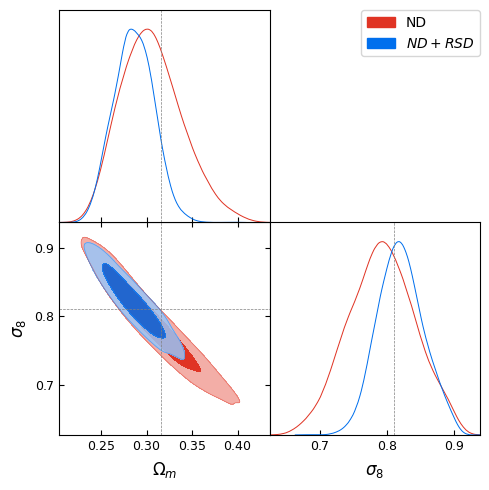

In [137]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([ND_samples, ND_RSD_samples], ['Ωm', 's8'], filled=True, 
                markers={'Ωm':0.315,
                         's8':0.811})
g.export('/mnt/c/Users/Jaime/Desktop/Growth_with_RSDs/Wms8.pdf')

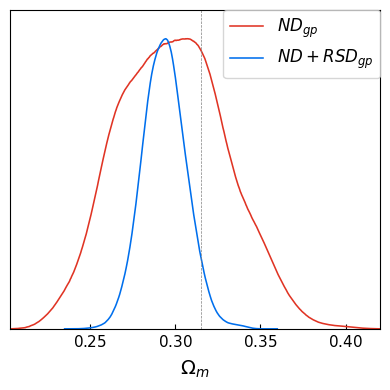

In [176]:
g = plots.getSubplotPlotter(subplot_size=4)
g.triangle_plot([ND_gp_samples, ND_RSD_gp_samples], ['Ωm'], filled=True, 
                markers={'Ωm':0.315})
g.export('/mnt/c/Users/Jaime/Desktop/Growth_with_RSDs/Wm.pdf')

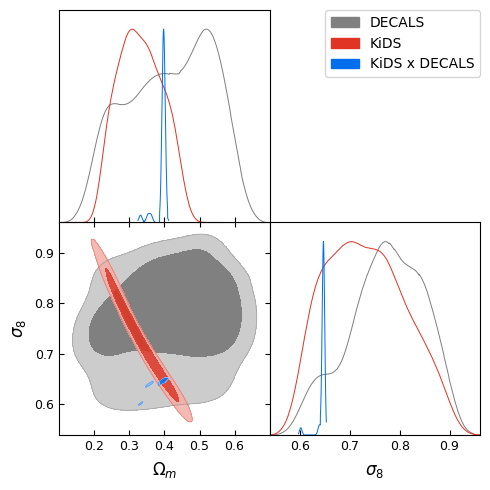

In [15]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DECALS_samples, KiDS_samples, DECALS_KiDS_samples], ['Ωm', 's8'], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/DESY1_comp.pdf')

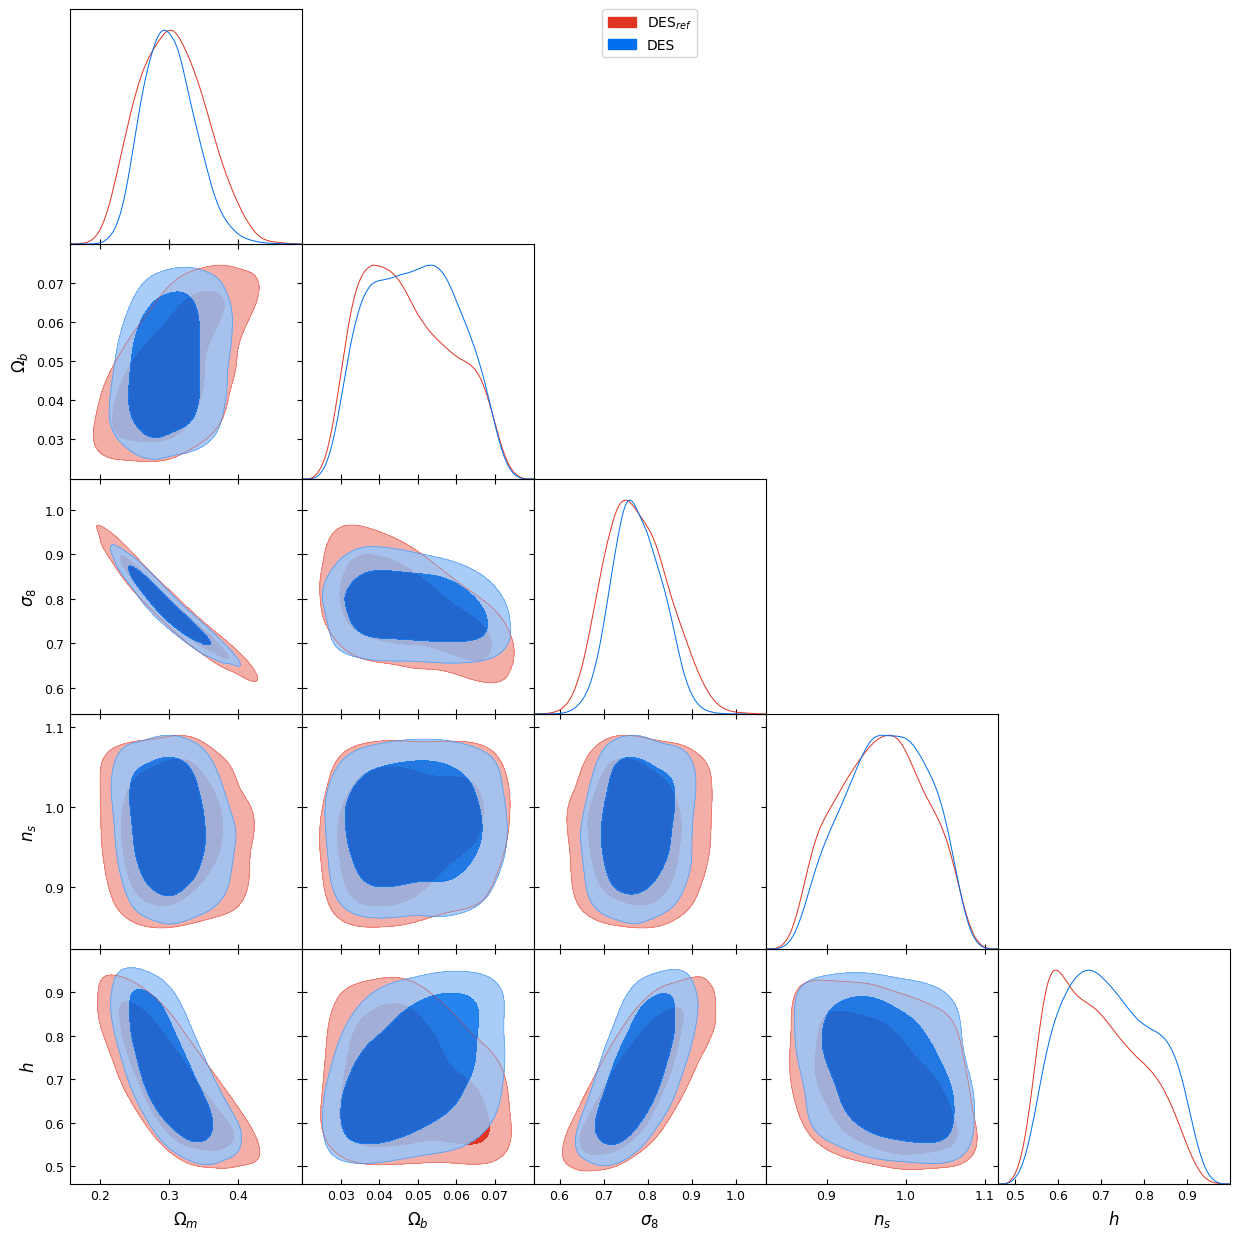

In [105]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([ DES_ref_samples, DES_samples], ['Ωm', 'Ωb', 's8', 'ns', 'h'], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/DESY1_comp.pdf')

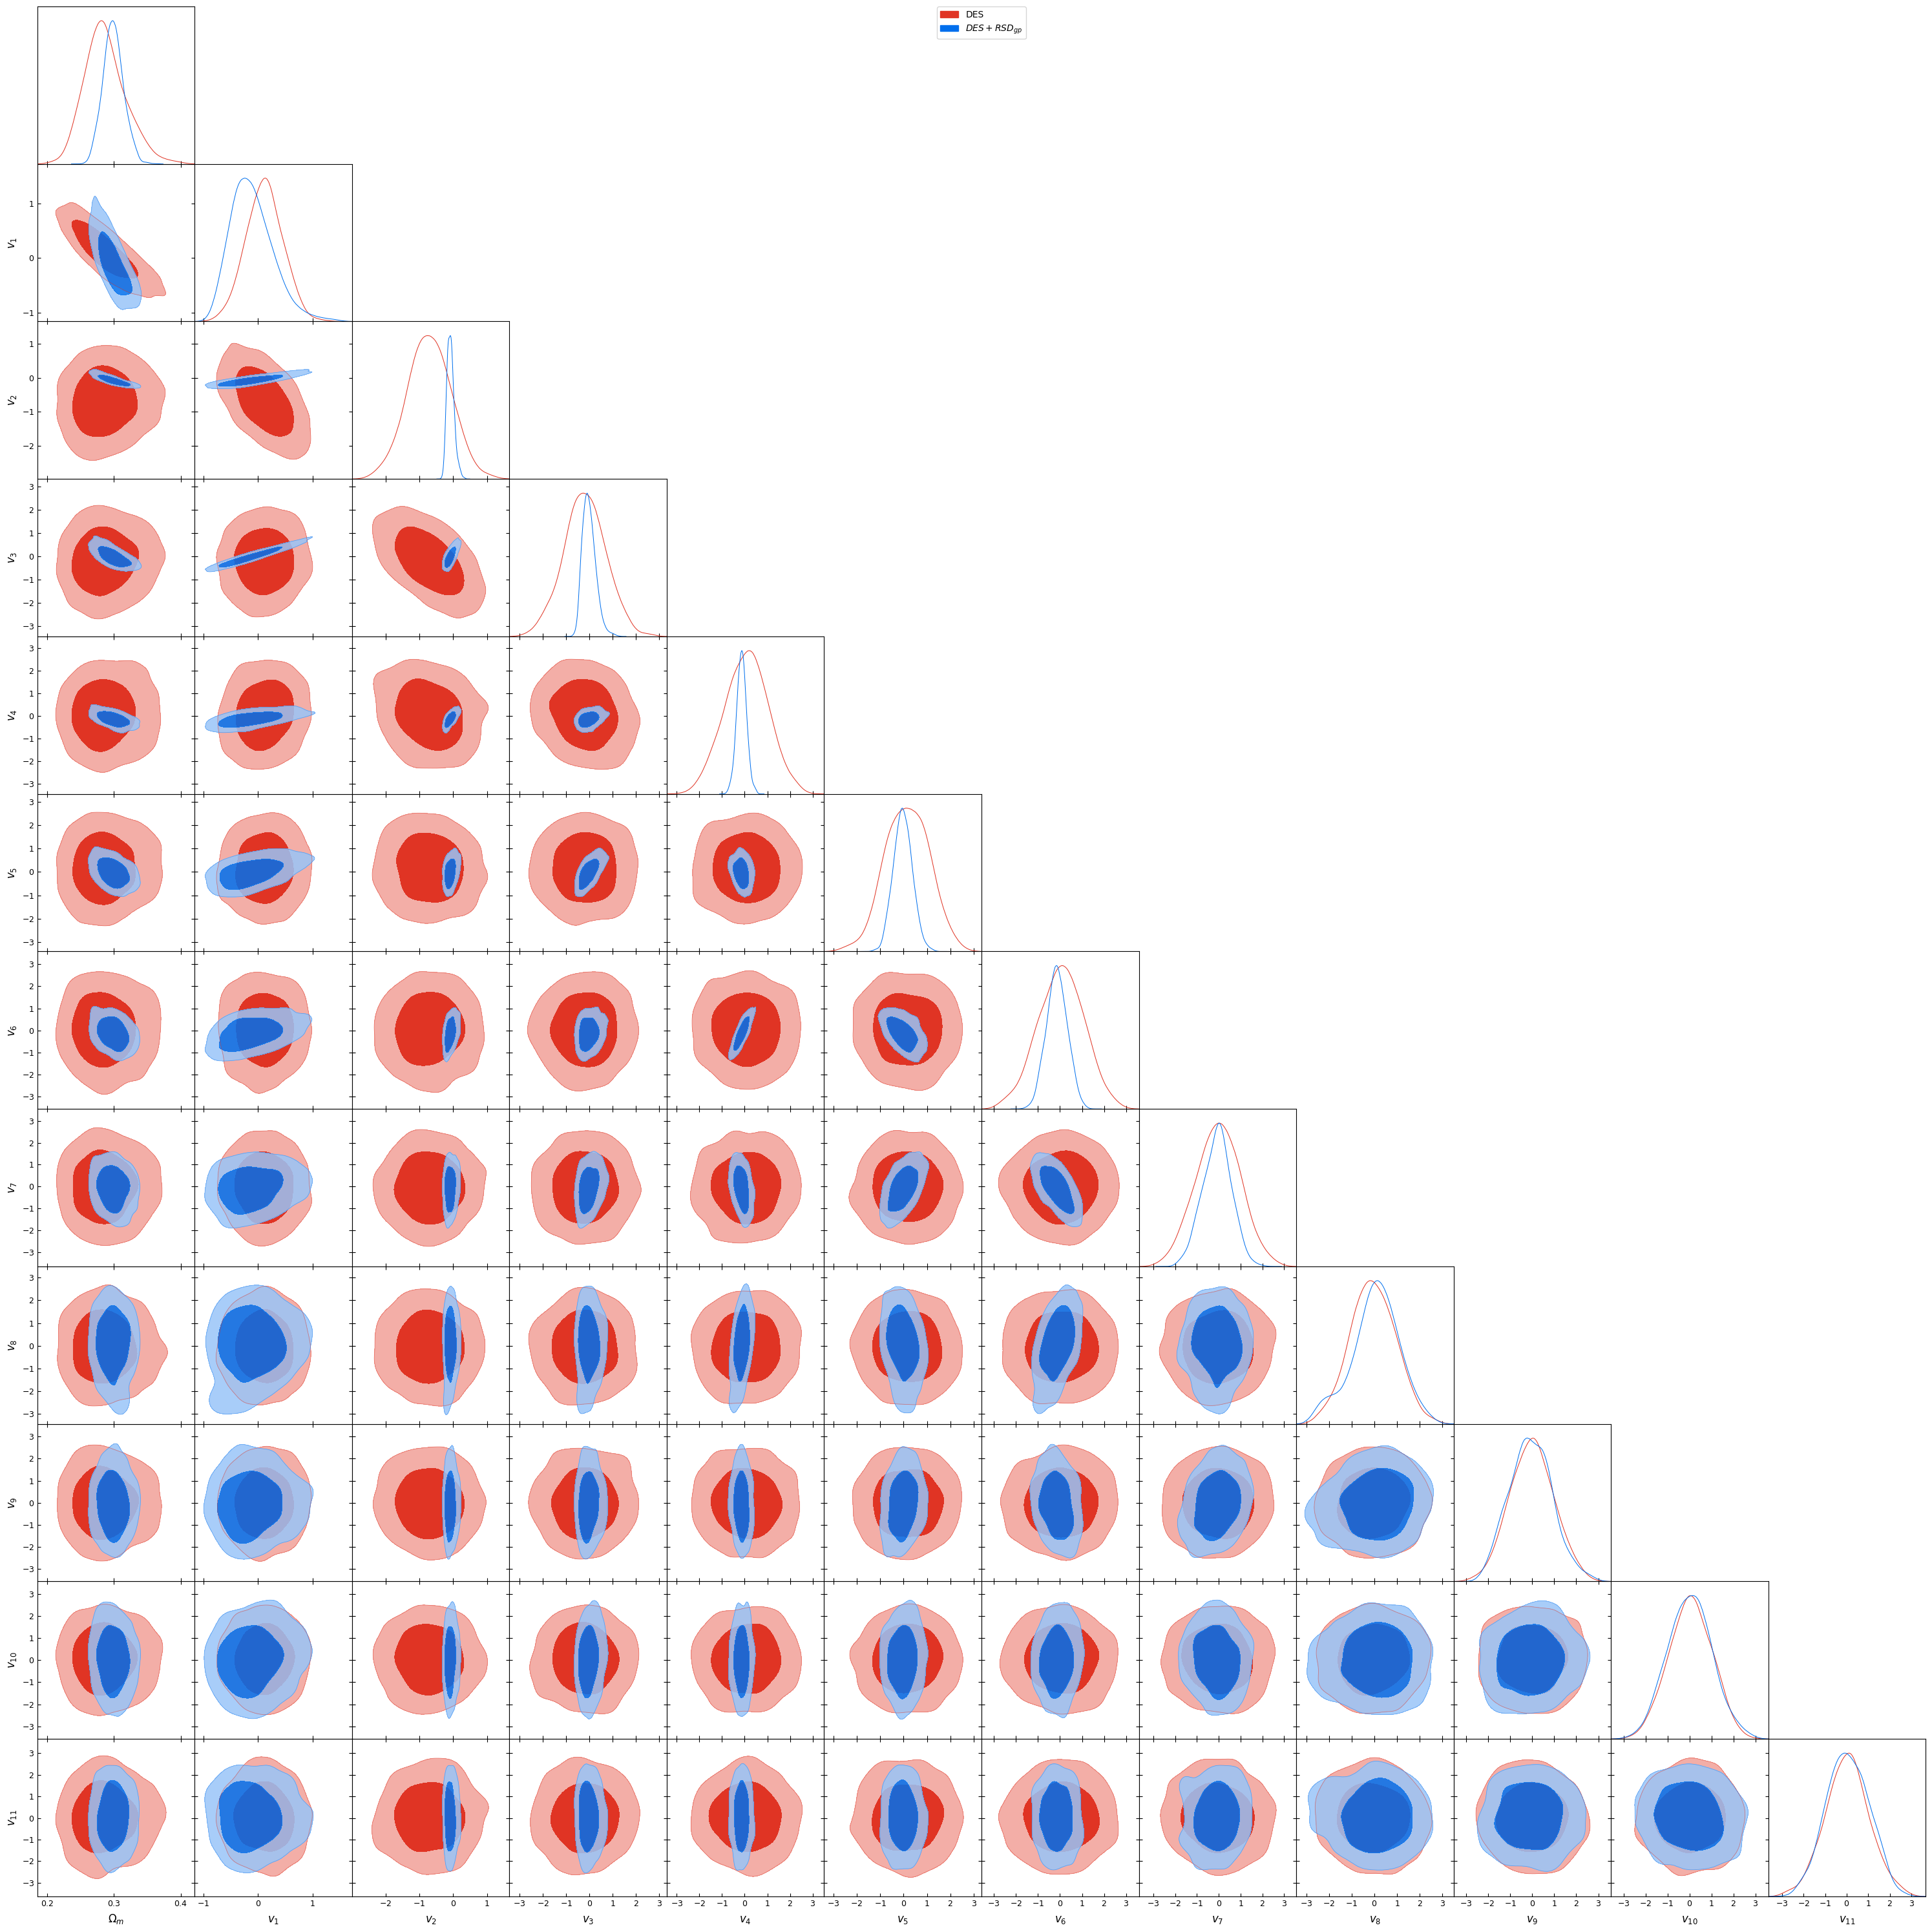

In [106]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DES_gp_samples, DES_RSD_gp_samples],
                ['Ωm', 'v[1]', 'v[2]', 'v[3]', 'v[4]', 'v[5]',
                 'v[6]', 'v[7]', 'v[8]', 'v[9]', 'v[10]',
                 'v[11]'], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/Growth_with_RSDs/gp_nodes.pdf')

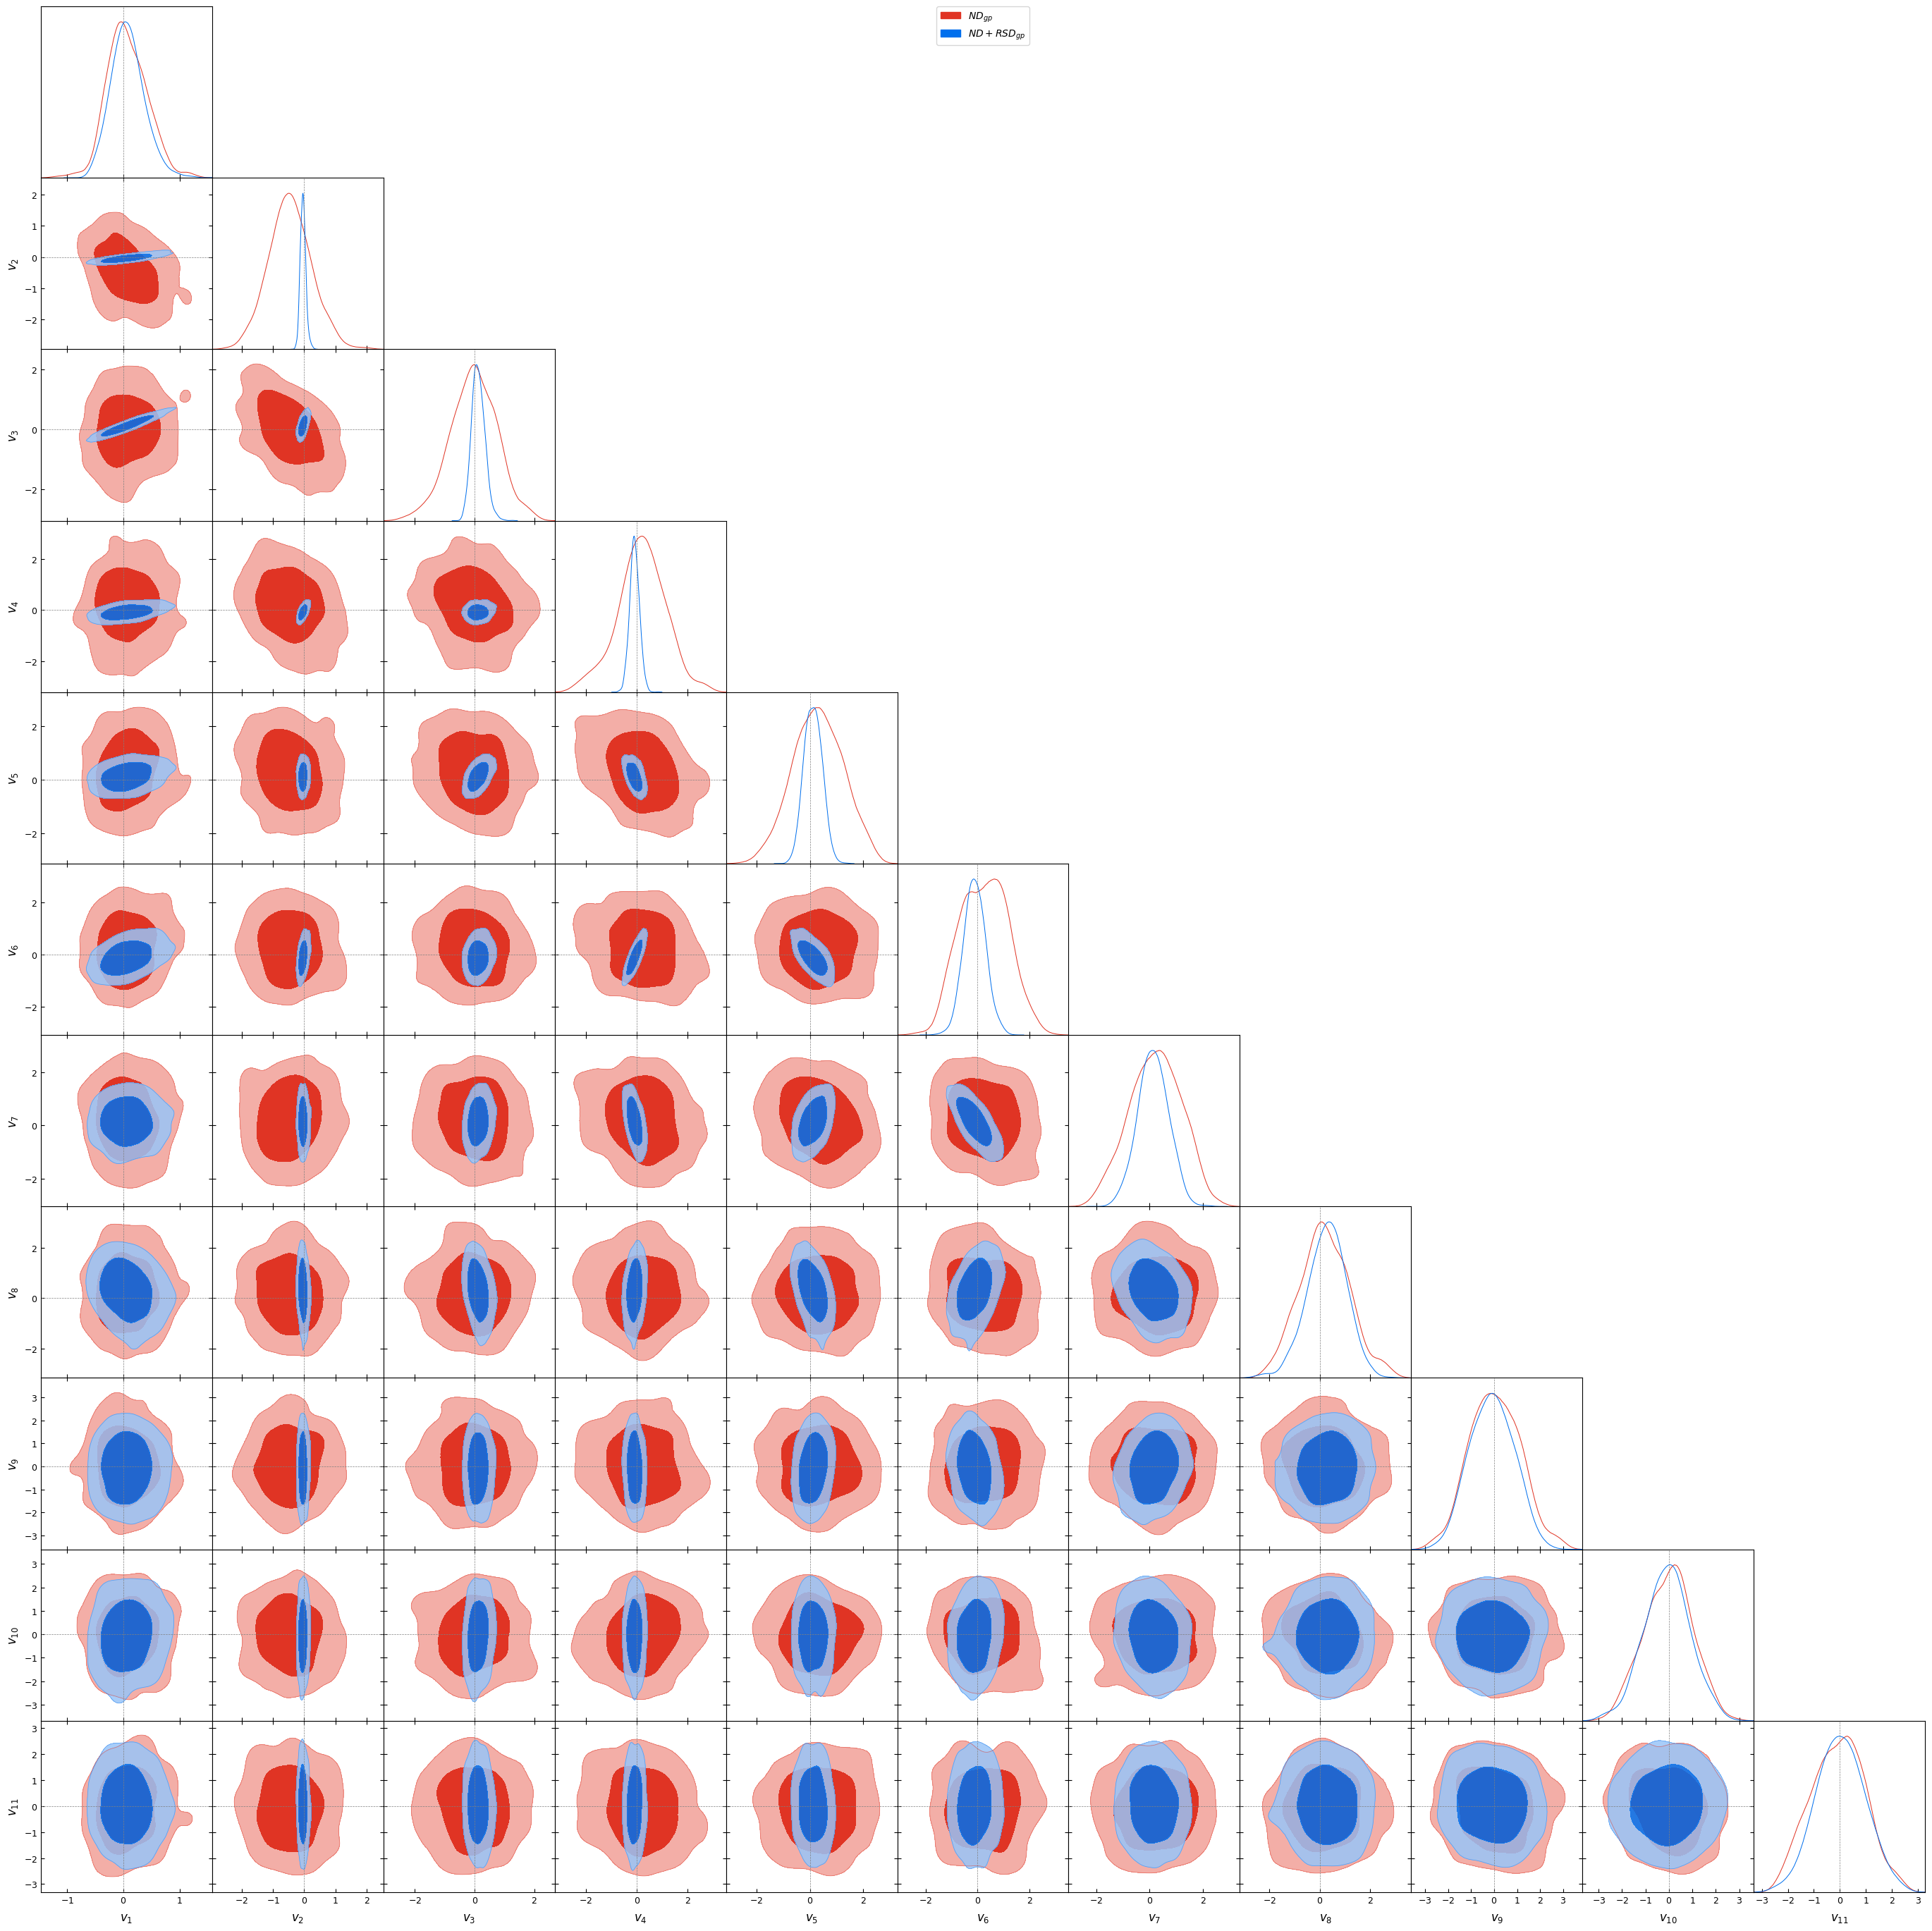

In [139]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([ND_gp_samples, ND_RSD_gp_samples],
                ['v[1]', 'v[2]', 'v[3]', 'v[4]', 'v[5]',
                 'v[6]', 'v[7]', 'v[8]', 'v[9]', 'v[10]',
                 'v[11]'], filled=True, 
                 markers={'v[1]':0, 'v[2]':0, 'v[3]':0,
                          'v[4]':0, 'v[5]':0, 'v[6]':0,
                          'v[8]':0, 'v[9]':0, 'v[10]':0,
                          'v[11]':0})
g.export('/mnt/c/Users/Jaime/Desktop/Growth_with_RSDs/gp_nodes.pdf')

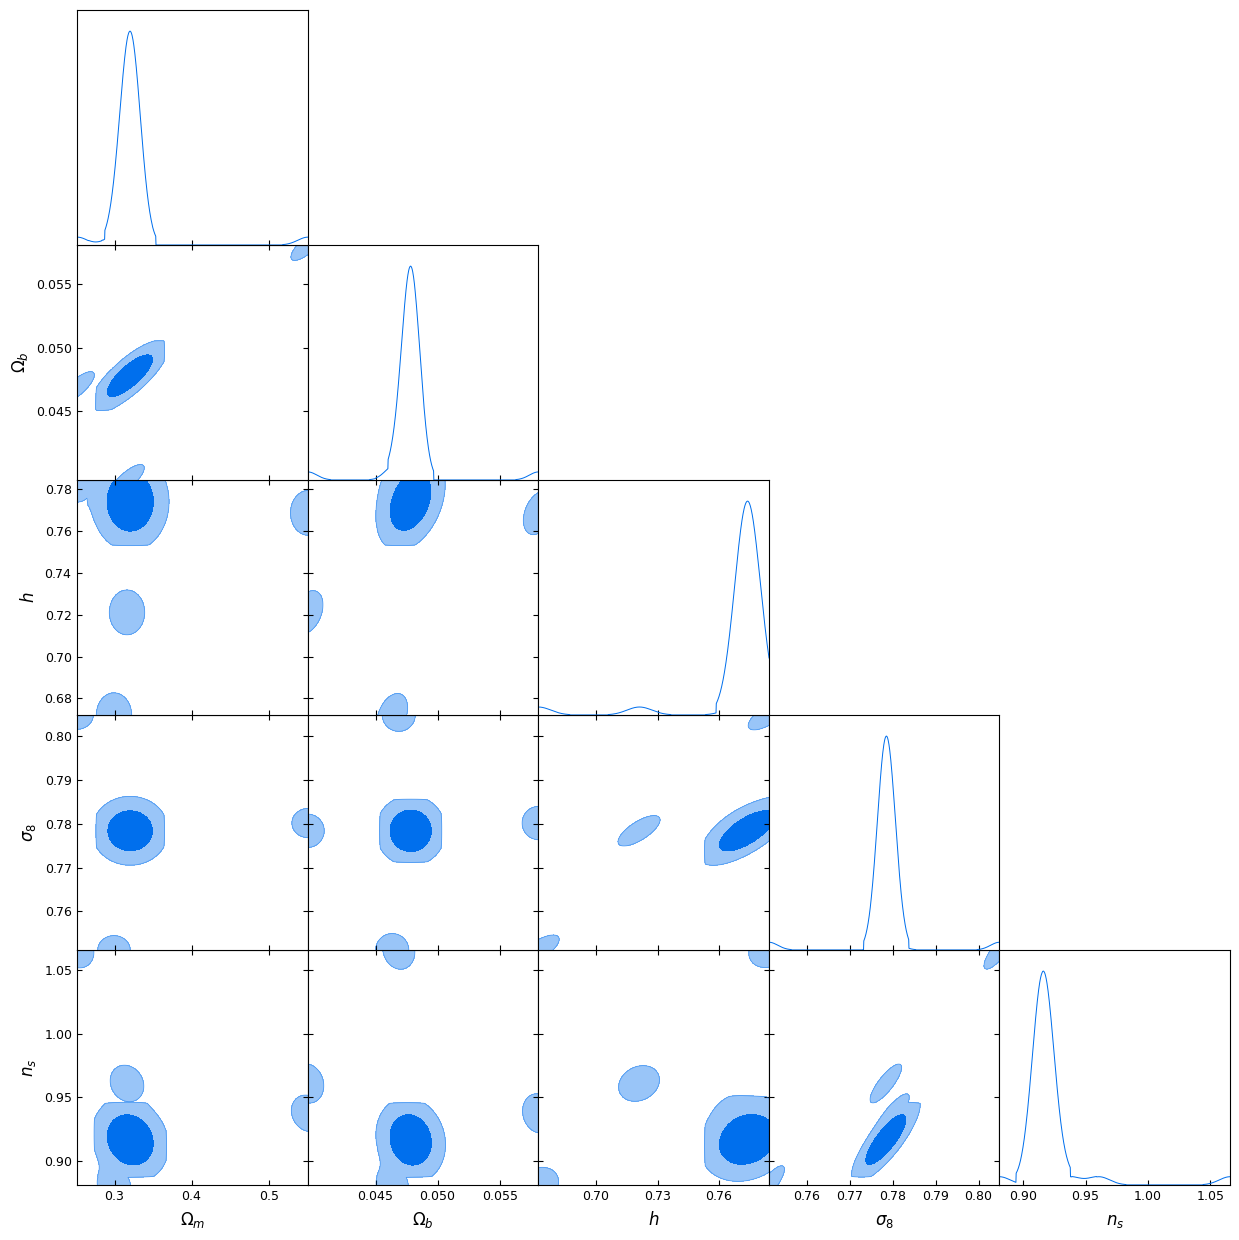

In [12]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(SD_cosmo_samples, filled=True)

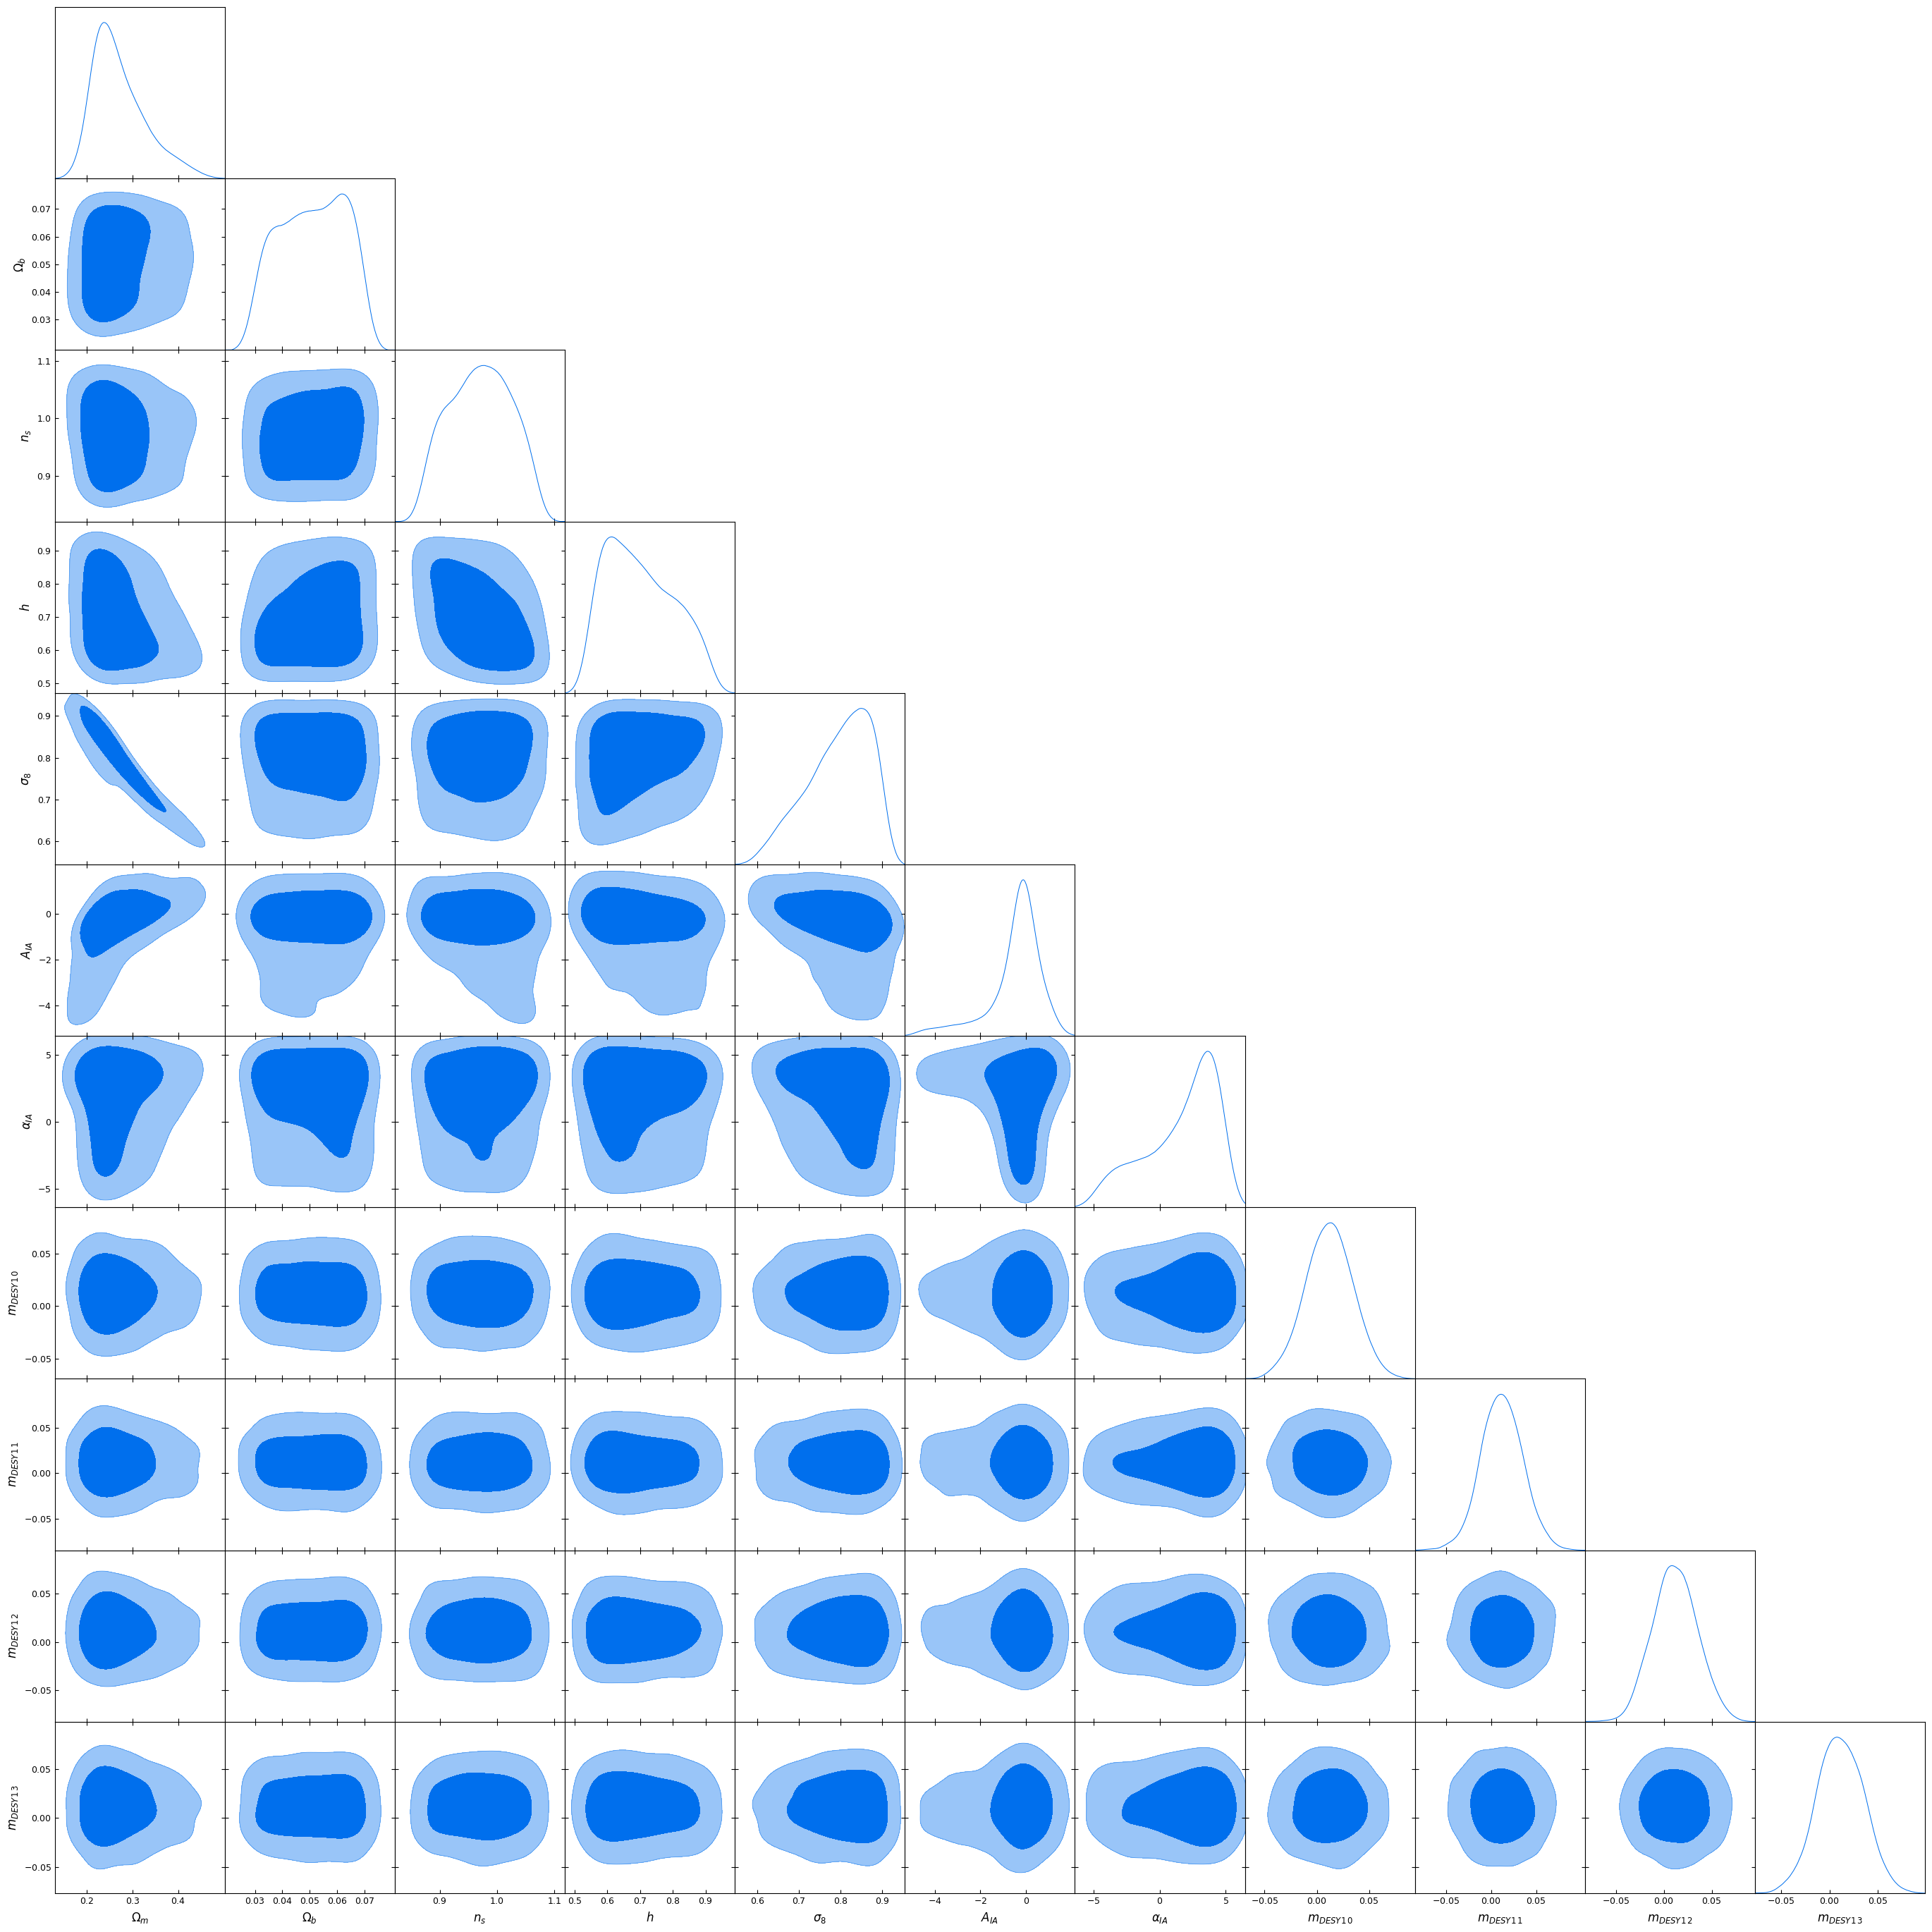

In [70]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(wlwl_test_samples, ['Ωm', 'Ωb', 'ns', 'h', 's8',
                                    'A_IA', 'alpha_IA',
                                    'DESwl__0_e_m',  'DESwl__1_e_m', 'DESwl__2_e_m',  'DESwl__3_e_m'], filled=True)

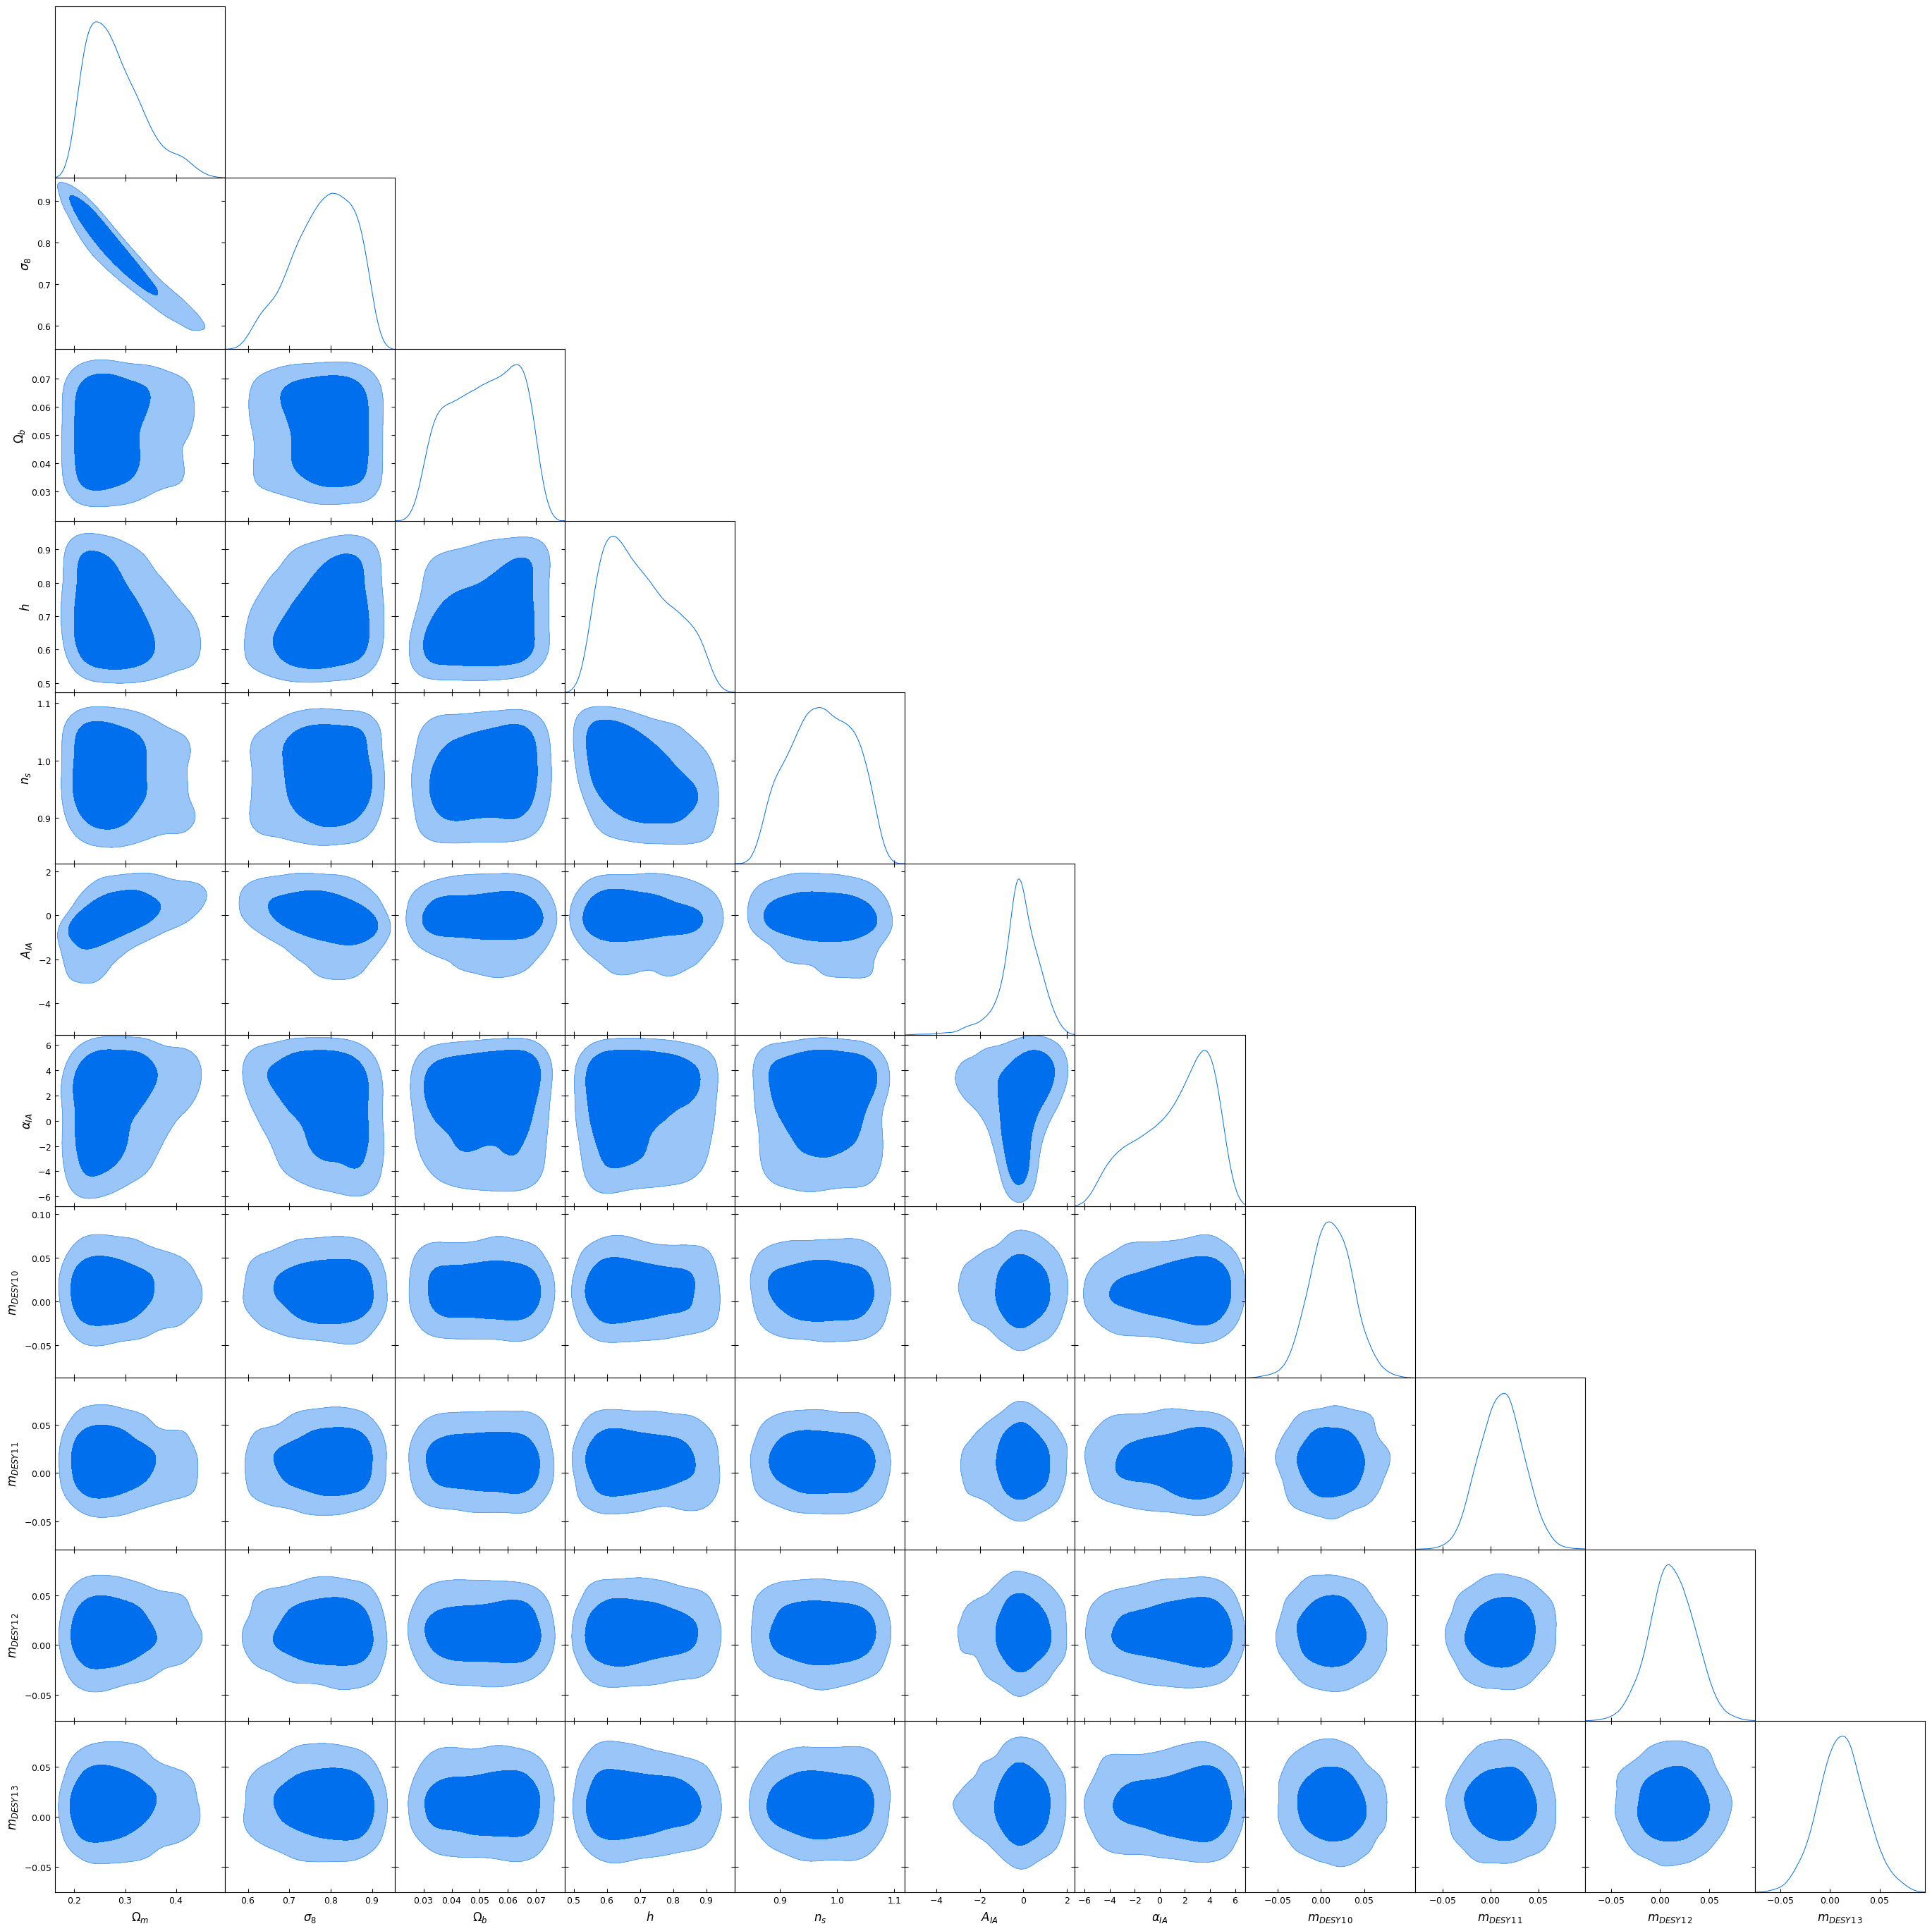

In [9]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(Nzs100_samples, filled=True)

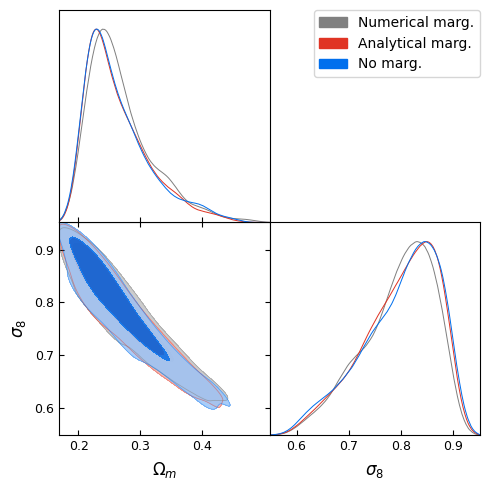

In [17]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([Nzs_numerical_samples, Nzs_anal_samples, Nzs_nomarg_samples],  ['Ωm', 's8'], filled=True,
                legend_labels=['Numerical marg.', 'Analytical marg.', 'No marg.'])
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/Wm_s8.pdf')

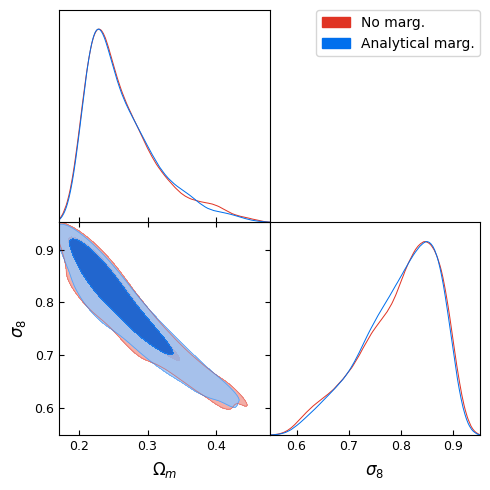

In [185]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([Nzs_nomarg_samples, Nzs_anal_samples],  ['Ωm', 's8'], filled=True,
                legend_labels=['No marg.', 'Analytical marg.'])
g.export('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/Wm_s8.pdf')

# Nzs

In [10]:
Nz0_data = np.load("../data/DESY1/lite10_nzs/nz_DESwl__0_e.npz")
Nz1_data = np.load("../data/DESY1/lite10_nzs/nz_DESwl__1_e.npz")
Nz2_data = np.load("../data/DESY1/lite10_nzs/nz_DESwl__2_e.npz")
Nz3_data = np.load("../data/DESY1/lite10_nzs/nz_DESwl__3_e.npz");

In [11]:
def make_nzs(file, binn):
    nz_names = file.keys()
    sel = [str(binn) + "_e_nz" in name for name in nz_names]
    nz_names = nz_names[sel]
    print(nz_names)
    ms = np.array([])
    ss = np.array([])
    for name in nz_names:
        nz = np.array(file[name])
        ms = np.append(ms, np.mean(nz))
        ss = np.append(ss, np.std(nz))
    return ms, ss

In [12]:
Nz_s8_0_m, Nz_s8_0_s = make_nzs(wlwl_Nzs_Omega_s8, 0)
Nz_s8_1_m, Nz_s8_1_s = make_nzs(wlwl_Nzs_Omega_s8, 1)
Nz_s8_2_m, Nz_s8_2_s = make_nzs(wlwl_Nzs_Omega_s8, 2)
Nz_s8_3_m, Nz_s8_3_s = make_nzs(wlwl_Nzs_Omega_s8, 3)

Index(['DESwl__0_e_nz_1', 'DESwl__0_e_nz_2', 'DESwl__0_e_nz_3',
       'DESwl__0_e_nz_4', 'DESwl__0_e_nz_5', 'DESwl__0_e_nz_6',
       'DESwl__0_e_nz_7', 'DESwl__0_e_nz_8', 'DESwl__0_e_nz_9',
       'DESwl__0_e_nz_10'],
      dtype='object')
Index(['DESwl__1_e_nz_1', 'DESwl__1_e_nz_2', 'DESwl__1_e_nz_3',
       'DESwl__1_e_nz_4', 'DESwl__1_e_nz_5', 'DESwl__1_e_nz_6',
       'DESwl__1_e_nz_7', 'DESwl__1_e_nz_8', 'DESwl__1_e_nz_9',
       'DESwl__1_e_nz_10'],
      dtype='object')
Index(['DESwl__2_e_nz_1', 'DESwl__2_e_nz_2', 'DESwl__2_e_nz_3',
       'DESwl__2_e_nz_4', 'DESwl__2_e_nz_5', 'DESwl__2_e_nz_6',
       'DESwl__2_e_nz_7', 'DESwl__2_e_nz_8', 'DESwl__2_e_nz_9',
       'DESwl__2_e_nz_10'],
      dtype='object')
Index(['DESwl__3_e_nz_1', 'DESwl__3_e_nz_2', 'DESwl__3_e_nz_3',
       'DESwl__3_e_nz_4', 'DESwl__3_e_nz_5', 'DESwl__3_e_nz_6',
       'DESwl__3_e_nz_7', 'DESwl__3_e_nz_8', 'DESwl__3_e_nz_9',
       'DESwl__3_e_nz_10'],
      dtype='object')


In [13]:
Nz_0_m, Nz_0_s = make_nzs(wlwl_Nzs_Omega, 0)
Nz_1_m, Nz_1_s = make_nzs(wlwl_Nzs_Omega, 1)
Nz_2_m, Nz_2_s = make_nzs(wlwl_Nzs_Omega, 2)
Nz_3_m, Nz_3_s = make_nzs(wlwl_Nzs_Omega, 3)

Index(['DESwl__0_e_nz_1', 'DESwl__0_e_nz_2', 'DESwl__0_e_nz_3',
       'DESwl__0_e_nz_4', 'DESwl__0_e_nz_5', 'DESwl__0_e_nz_6',
       'DESwl__0_e_nz_7', 'DESwl__0_e_nz_8', 'DESwl__0_e_nz_9',
       'DESwl__0_e_nz_10'],
      dtype='object')
Index(['DESwl__1_e_nz_1', 'DESwl__1_e_nz_2', 'DESwl__1_e_nz_3',
       'DESwl__1_e_nz_4', 'DESwl__1_e_nz_5', 'DESwl__1_e_nz_6',
       'DESwl__1_e_nz_7', 'DESwl__1_e_nz_8', 'DESwl__1_e_nz_9',
       'DESwl__1_e_nz_10'],
      dtype='object')
Index(['DESwl__2_e_nz_1', 'DESwl__2_e_nz_2', 'DESwl__2_e_nz_3',
       'DESwl__2_e_nz_4', 'DESwl__2_e_nz_5', 'DESwl__2_e_nz_6',
       'DESwl__2_e_nz_7', 'DESwl__2_e_nz_8', 'DESwl__2_e_nz_9',
       'DESwl__2_e_nz_10'],
      dtype='object')
Index(['DESwl__3_e_nz_1', 'DESwl__3_e_nz_2', 'DESwl__3_e_nz_3',
       'DESwl__3_e_nz_4', 'DESwl__3_e_nz_5', 'DESwl__3_e_nz_6',
       'DESwl__3_e_nz_7', 'DESwl__3_e_nz_8', 'DESwl__3_e_nz_9',
       'DESwl__3_e_nz_10'],
      dtype='object')


In [14]:
Nz_MvN_0_m, Nz_MvN_0_s = make_nzs(wlwl_Nzs_Omega_trunc, 0)
Nz_MvN_1_m, Nz_MvN_1_s = make_nzs(wlwl_Nzs_Omega_trunc, 1)
Nz_MvN_2_m, Nz_MvN_2_s = make_nzs(wlwl_Nzs_Omega_trunc, 2)
Nz_MvN_3_m, Nz_MvN_3_s = make_nzs(wlwl_Nzs_Omega_trunc, 3)

Index(['DESwl__0_e_nz_1', 'DESwl__0_e_nz_2', 'DESwl__0_e_nz_3',
       'DESwl__0_e_nz_4', 'DESwl__0_e_nz_5', 'DESwl__0_e_nz_6',
       'DESwl__0_e_nz_7', 'DESwl__0_e_nz_8', 'DESwl__0_e_nz_9',
       'DESwl__0_e_nz_10'],
      dtype='object')
Index(['DESwl__1_e_nz_1', 'DESwl__1_e_nz_2', 'DESwl__1_e_nz_3',
       'DESwl__1_e_nz_4', 'DESwl__1_e_nz_5', 'DESwl__1_e_nz_6',
       'DESwl__1_e_nz_7', 'DESwl__1_e_nz_8', 'DESwl__1_e_nz_9',
       'DESwl__1_e_nz_10'],
      dtype='object')
Index(['DESwl__2_e_nz_1', 'DESwl__2_e_nz_2', 'DESwl__2_e_nz_3',
       'DESwl__2_e_nz_4', 'DESwl__2_e_nz_5', 'DESwl__2_e_nz_6',
       'DESwl__2_e_nz_7', 'DESwl__2_e_nz_8', 'DESwl__2_e_nz_9',
       'DESwl__2_e_nz_10'],
      dtype='object')
Index(['DESwl__3_e_nz_1', 'DESwl__3_e_nz_2', 'DESwl__3_e_nz_3',
       'DESwl__3_e_nz_4', 'DESwl__3_e_nz_5', 'DESwl__3_e_nz_6',
       'DESwl__3_e_nz_7', 'DESwl__3_e_nz_8', 'DESwl__3_e_nz_9',
       'DESwl__3_e_nz_10'],
      dtype='object')


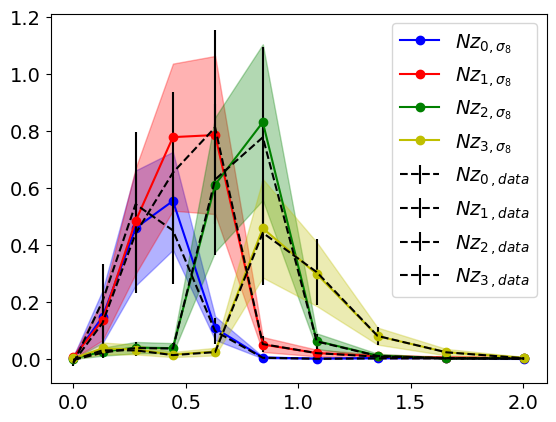

In [15]:
plt.errorbar(Nz0_data["z"], Nz0_data["dndz"], 
             yerr=np.sqrt(Nz0_data["cov"]),
             fmt="k--", label=r"$Nz_{0 \, , data}$")
plt.plot(Nz0_data["z"], Nz_s8_0_m, 'bo-', label=r"$Nz_{0, \sigma_8}$")
plt.fill_between(Nz0_data["z"], Nz_s8_0_m+Nz_s8_0_s, Nz_s8_0_m-Nz_s8_0_s, color='b', alpha=.3)

plt.errorbar(Nz1_data["z"], Nz1_data["dndz"], 
             yerr=np.sqrt(Nz1_data["cov"]),
             fmt="k--", label=r"$Nz_{1 \, , data}$")
plt.plot(Nz1_data["z"], Nz_s8_1_m, 'ro-', label=r"$Nz_{1, \sigma_8}$")
plt.fill_between(Nz1_data["z"], Nz_s8_1_m+Nz_s8_1_s, Nz_s8_1_m-Nz_s8_1_s, color='r', alpha=.3)

plt.errorbar(Nz2_data["z"], Nz2_data["dndz"], 
             yerr=np.sqrt(Nz2_data["cov"]),
             fmt="k--", label=r"$Nz_{2 \, , data}$")
plt.plot(Nz2_data["z"], Nz_s8_2_m, 'go-', label=r"$Nz_{2, \sigma_8}$")
plt.fill_between(Nz2_data["z"], Nz_s8_2_m+Nz_s8_2_s, Nz_s8_2_m-Nz_s8_2_s, color='g', alpha=.3)

plt.errorbar(Nz3_data["z"], Nz3_data["dndz"], 
             yerr=np.sqrt(Nz3_data["cov"]),
             fmt="k--", label=r"$Nz_{3 \, , data}$")
plt.plot(Nz3_data["z"], Nz_s8_3_m, 'yo-', label=r"$Nz_{3, \sigma_8}$")
plt.fill_between(Nz3_data["z"], Nz_s8_3_m+Nz_s8_3_s, Nz_s8_3_m-Nz_s8_3_s, color='y', alpha=.3)

plt.legend();

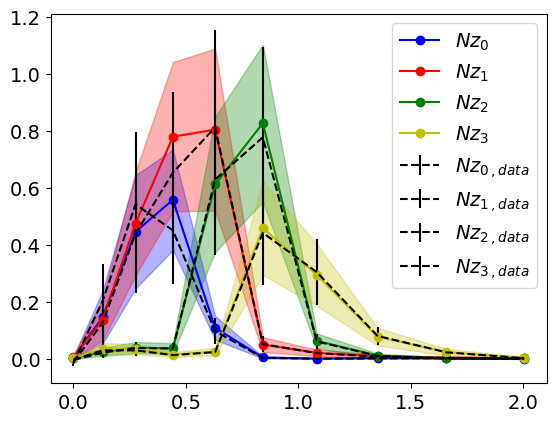

In [16]:
plt.errorbar(Nz0_data["z"], Nz0_data["dndz"], 
             yerr=np.sqrt(Nz0_data["cov"]),
             fmt="k--", label=r"$Nz_{0 \, , data}$")
plt.plot(Nz0_data["z"], Nz_0_m, 'bo-', label=r"$Nz_0$")
plt.fill_between(Nz0_data["z"], Nz_0_m+Nz_0_s, Nz_0_m-Nz_0_s, color='b', alpha=.3)

plt.errorbar(Nz1_data["z"], Nz1_data["dndz"], 
             yerr=np.sqrt(Nz1_data["cov"]),
             fmt="k--", label=r"$Nz_{1 \, , data}$")
plt.plot(Nz1_data["z"], Nz_1_m, 'ro-', label=r"$Nz_1$")
plt.fill_between(Nz1_data["z"], Nz_1_m+Nz_1_s, Nz_1_m-Nz_1_s, color='r', alpha=.3)

plt.errorbar(Nz2_data["z"], Nz2_data["dndz"], 
             yerr=np.sqrt(Nz2_data["cov"]),
             fmt="k--", label=r"$Nz_{2 \, , data}$")
plt.plot(Nz2_data["z"], Nz_2_m, 'go-', label=r"$Nz_2$")
plt.fill_between(Nz2_data["z"], Nz_2_m+Nz_2_s, Nz_2_m-Nz_2_s, color='g', alpha=.3)

plt.errorbar(Nz3_data["z"], Nz3_data["dndz"], 
             yerr=np.sqrt(Nz3_data["cov"]),
             fmt="k--", label=r"$Nz_{3 \, , data}$")
plt.plot(Nz3_data["z"], Nz_3_m, 'yo-', label=r"$Nz_3$")
plt.fill_between(Nz3_data["z"], Nz_3_m+Nz_3_s, Nz_3_m-Nz_3_s, color='y', alpha=.3)

plt.legend();

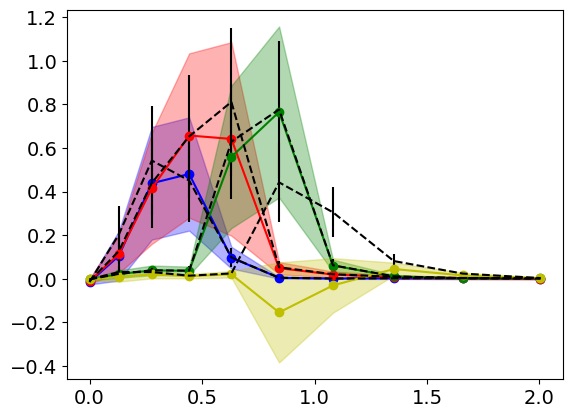

In [17]:
plt.errorbar(Nz0_data["z"], Nz0_data["dndz"], 
             yerr=np.sqrt(Nz0_data["cov"]),
             fmt="k--", label=r"$Nz_{0 \, , data}$")
plt.plot(Nz0_data["z"], Nz_MvN_0_m, 'bo-', label=r"$Nz_0$")
plt.fill_between(Nz0_data["z"], Nz_MvN_0_m+Nz_MvN_0_s,
                 Nz_MvN_0_m-Nz_MvN_0_s, color='b', alpha=.3)

plt.errorbar(Nz1_data["z"], Nz1_data["dndz"], 
             yerr=np.sqrt(Nz1_data["cov"]),
             fmt="k--", label=r"$Nz_{1 \, , data}$")
plt.plot(Nz1_data["z"], Nz_MvN_1_m, 'ro-', label=r"$Nz_1$")
plt.fill_between(Nz1_data["z"], Nz_MvN_1_m+Nz_MvN_1_s,
                 Nz_MvN_1_m-Nz_MvN_1_s, color='r', alpha=.3)

plt.errorbar(Nz2_data["z"], Nz2_data["dndz"], 
             yerr=np.sqrt(Nz2_data["cov"]),
             fmt="k--", label=r"$Nz_{2 \, , data}$")
plt.plot(Nz2_data["z"], Nz_MvN_2_m, 'go-', label=r"$Nz_2$")
plt.fill_between(Nz2_data["z"], Nz_MvN_2_m+Nz_MvN_2_s,
                 Nz_MvN_2_m-Nz_MvN_2_s, color='g', alpha=.3)

plt.errorbar(Nz3_data["z"], Nz3_data["dndz"], 
             yerr=np.sqrt(Nz3_data["cov"]),
             fmt="k--", label=r"$Nz_{3 \, , data}$")
plt.plot(Nz3_data["z"], Nz_MvN_3_m, 'yo-', label=r"$Nz_3$")
plt.fill_between(Nz3_data["z"], Nz_MvN_3_m+Nz_MvN_3_s,
                 Nz_MvN_3_m-Nz_MvN_3_s, color='y', alpha=.3)

#plt.legend();

In [18]:
Nz0_data = np.load("../data/DESY1/lite20_nzs/nz_DESwl__0_e.npz")
Nz1_data = np.load("../data/DESY1/lite20_nzs/nz_DESwl__1_e.npz")
Nz2_data = np.load("../data/DESY1/lite20_nzs/nz_DESwl__2_e.npz")
Nz3_data = np.load("../data/DESY1/lite20_nzs/nz_DESwl__3_e.npz");

In [19]:
Nz_0_m, Nz_0_s = make_nzs(wlwl_Nzs80_Omega, 0)
Nz_1_m, Nz_1_s = make_nzs(wlwl_Nzs80_Omega, 1)
Nz_2_m, Nz_2_s = make_nzs(wlwl_Nzs80_Omega, 2)
Nz_3_m, Nz_3_s = make_nzs(wlwl_Nzs80_Omega, 3)

Index(['DESwl__0_e_nz[1]', 'DESwl__0_e_nz[2]', 'DESwl__0_e_nz[3]',
       'DESwl__0_e_nz[4]', 'DESwl__0_e_nz[5]', 'DESwl__0_e_nz[6]',
       'DESwl__0_e_nz[7]', 'DESwl__0_e_nz[8]', 'DESwl__0_e_nz[9]',
       'DESwl__0_e_nz[10]', 'DESwl__0_e_nz[11]', 'DESwl__0_e_nz[12]',
       'DESwl__0_e_nz[13]', 'DESwl__0_e_nz[14]', 'DESwl__0_e_nz[15]',
       'DESwl__0_e_nz[16]', 'DESwl__0_e_nz[17]', 'DESwl__0_e_nz[18]',
       'DESwl__0_e_nz[19]', 'DESwl__0_e_nz[20]'],
      dtype='object')
Index(['DESwl__1_e_nz[1]', 'DESwl__1_e_nz[2]', 'DESwl__1_e_nz[3]',
       'DESwl__1_e_nz[4]', 'DESwl__1_e_nz[5]', 'DESwl__1_e_nz[6]',
       'DESwl__1_e_nz[7]', 'DESwl__1_e_nz[8]', 'DESwl__1_e_nz[9]',
       'DESwl__1_e_nz[10]', 'DESwl__1_e_nz[11]', 'DESwl__1_e_nz[12]',
       'DESwl__1_e_nz[13]', 'DESwl__1_e_nz[14]', 'DESwl__1_e_nz[15]',
       'DESwl__1_e_nz[16]', 'DESwl__1_e_nz[17]', 'DESwl__1_e_nz[18]',
       'DESwl__1_e_nz[19]', 'DESwl__1_e_nz[20]'],
      dtype='object')
Index(['DESwl__2_e_nz[1]', 'DESwl_

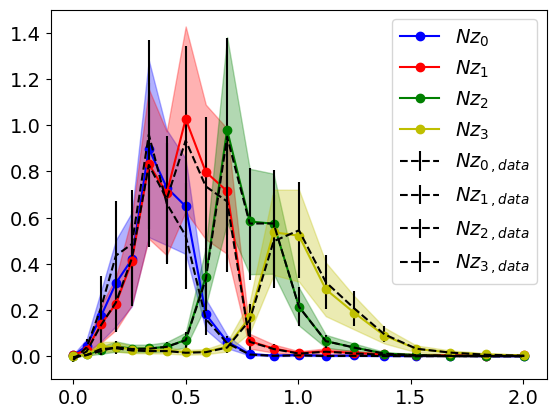

In [20]:
plt.errorbar(Nz0_data["z"], Nz0_data["dndz"], 
             yerr=np.sqrt(Nz0_data["cov"]),
             fmt="k--", label=r"$Nz_{0 \, , data}$")
plt.plot(Nz0_data["z"], Nz_0_m, 'bo-', label=r"$Nz_0$")
plt.fill_between(Nz0_data["z"], Nz_0_m+Nz_0_s, Nz_0_m-Nz_0_s, color='b', alpha=.3)

plt.errorbar(Nz1_data["z"], Nz1_data["dndz"], 
             yerr=np.sqrt(Nz1_data["cov"]),
             fmt="k--", label=r"$Nz_{1 \, , data}$")
plt.plot(Nz1_data["z"], Nz_1_m, 'ro-', label=r"$Nz_1$")
plt.fill_between(Nz1_data["z"], Nz_1_m+Nz_1_s, Nz_1_m-Nz_1_s, color='r', alpha=.3)

plt.errorbar(Nz2_data["z"], Nz2_data["dndz"], 
             yerr=np.sqrt(Nz2_data["cov"]),
             fmt="k--", label=r"$Nz_{2 \, , data}$")
plt.plot(Nz2_data["z"], Nz_2_m, 'go-', label=r"$Nz_2$")
plt.fill_between(Nz2_data["z"], Nz_2_m+Nz_2_s, Nz_2_m-Nz_2_s, color='g', alpha=.3)

plt.errorbar(Nz3_data["z"], Nz3_data["dndz"], 
             yerr=np.sqrt(Nz3_data["cov"]),
             fmt="k--", label=r"$Nz_{3 \, , data}$")
plt.plot(Nz3_data["z"], Nz_3_m, 'yo-', label=r"$Nz_3$")
plt.fill_between(Nz3_data["z"], Nz_3_m+Nz_3_s, Nz_3_m-Nz_3_s, color='y', alpha=.3)

plt.legend();

In [21]:
Nz0_data = np.load("../data/DESY1/binned_25_nzs/nz_DESwl__0_e.npz")
Nz1_data = np.load("../data/DESY1/binned_25_nzs/nz_DESwl__1_e.npz")
Nz2_data = np.load("../data/DESY1/binned_25_nzs/nz_DESwl__2_e.npz")
Nz3_data = np.load("../data/DESY1/binned_25_nzs/nz_DESwl__3_e.npz");

In [22]:
Nz_0_m, Nz_0_s = make_nzs(wlwl_Nzs100_Omega_s8, 0)
Nz_1_m, Nz_1_s = make_nzs(wlwl_Nzs100_Omega_s8, 1)
Nz_2_m, Nz_2_s = make_nzs(wlwl_Nzs100_Omega_s8, 2)
Nz_3_m, Nz_3_s = make_nzs(wlwl_Nzs100_Omega_s8, 3)

Index(['DESwl__0_e_nz[1]', 'DESwl__0_e_nz[2]', 'DESwl__0_e_nz[3]',
       'DESwl__0_e_nz[4]', 'DESwl__0_e_nz[5]', 'DESwl__0_e_nz[6]',
       'DESwl__0_e_nz[7]', 'DESwl__0_e_nz[8]', 'DESwl__0_e_nz[9]',
       'DESwl__0_e_nz[10]', 'DESwl__0_e_nz[11]', 'DESwl__0_e_nz[12]',
       'DESwl__0_e_nz[13]', 'DESwl__0_e_nz[14]', 'DESwl__0_e_nz[15]',
       'DESwl__0_e_nz[16]', 'DESwl__0_e_nz[17]', 'DESwl__0_e_nz[18]',
       'DESwl__0_e_nz[19]', 'DESwl__0_e_nz[20]', 'DESwl__0_e_nz[21]',
       'DESwl__0_e_nz[22]', 'DESwl__0_e_nz[23]', 'DESwl__0_e_nz[24]',
       'DESwl__0_e_nz[25]'],
      dtype='object')
Index(['DESwl__1_e_nz[1]', 'DESwl__1_e_nz[2]', 'DESwl__1_e_nz[3]',
       'DESwl__1_e_nz[4]', 'DESwl__1_e_nz[5]', 'DESwl__1_e_nz[6]',
       'DESwl__1_e_nz[7]', 'DESwl__1_e_nz[8]', 'DESwl__1_e_nz[9]',
       'DESwl__1_e_nz[10]', 'DESwl__1_e_nz[11]', 'DESwl__1_e_nz[12]',
       'DESwl__1_e_nz[13]', 'DESwl__1_e_nz[14]', 'DESwl__1_e_nz[15]',
       'DESwl__1_e_nz[16]', 'DESwl__1_e_nz[17]', 'DESwl__

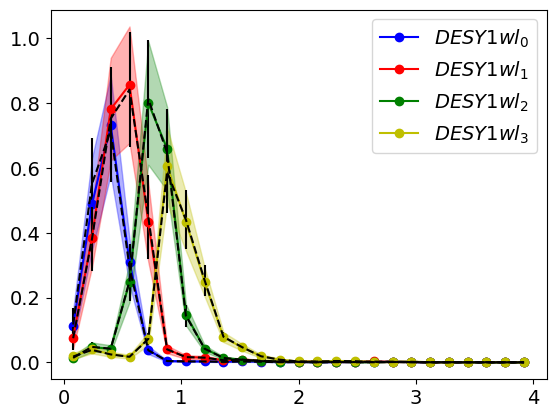

In [163]:
plt.errorbar(Nz0_data["z"], Nz0_data["dndz"], 
             yerr=np.sqrt(Nz0_data["cov"]),
             fmt="k--")
plt.plot(Nz0_data["z"], Nz_0_m, 'bo-', label=r"$DESY1wl_0$")
plt.fill_between(Nz0_data["z"], Nz_0_m+Nz_0_s, Nz_0_m-Nz_0_s, color='b', alpha=.3)

plt.errorbar(Nz1_data["z"], Nz1_data["dndz"], 
             yerr=np.sqrt(Nz1_data["cov"]),
             fmt="k--")
plt.plot(Nz1_data["z"], Nz_1_m, 'ro-', label=r"$DESY1wl_1$")
plt.fill_between(Nz1_data["z"], Nz_1_m+Nz_1_s, Nz_1_m-Nz_1_s, color='r', alpha=.3)

plt.errorbar(Nz2_data["z"], Nz2_data["dndz"], 
             yerr=np.sqrt(Nz2_data["cov"]),
             fmt="k--")
plt.plot(Nz2_data["z"], Nz_2_m, 'go-', label=r"$DESY1wl_2$")
plt.fill_between(Nz2_data["z"], Nz_2_m+Nz_2_s, Nz_2_m-Nz_2_s, color='g', alpha=.3)

plt.errorbar(Nz3_data["z"], Nz3_data["dndz"], 
             yerr=np.sqrt(Nz3_data["cov"]),
             fmt="k--")
plt.plot(Nz3_data["z"], Nz_3_m, 'yo-', label=r"$DESY1wl_3$")
plt.fill_between(Nz3_data["z"], Nz_3_m+Nz_3_s, Nz_3_m-Nz_3_s, color='y', alpha=.3)
plt.legend();

plt.savefig("/mnt/c/Users/jaime/Desktop/Nz_paper_plots/Nz_posterior.pdf")

In [24]:
Nz_0_m, Nz_0_s = make_nzs(Nzs100, 0)
Nz_1_m, Nz_1_s = make_nzs(Nzs100, 1)
Nz_2_m, Nz_2_s = make_nzs(Nzs100, 2)
Nz_3_m, Nz_3_s = make_nzs(Nzs100, 3)

Index(['DESwl__0_e_nz[1]', 'DESwl__0_e_nz[2]', 'DESwl__0_e_nz[3]',
       'DESwl__0_e_nz[4]', 'DESwl__0_e_nz[5]', 'DESwl__0_e_nz[6]',
       'DESwl__0_e_nz[7]', 'DESwl__0_e_nz[8]', 'DESwl__0_e_nz[9]',
       'DESwl__0_e_nz[10]', 'DESwl__0_e_nz[11]', 'DESwl__0_e_nz[12]',
       'DESwl__0_e_nz[13]', 'DESwl__0_e_nz[14]', 'DESwl__0_e_nz[15]',
       'DESwl__0_e_nz[16]', 'DESwl__0_e_nz[17]', 'DESwl__0_e_nz[18]',
       'DESwl__0_e_nz[19]', 'DESwl__0_e_nz[20]', 'DESwl__0_e_nz[21]',
       'DESwl__0_e_nz[22]', 'DESwl__0_e_nz[23]', 'DESwl__0_e_nz[24]',
       'DESwl__0_e_nz[25]'],
      dtype='object')
Index(['DESwl__1_e_nz[1]', 'DESwl__1_e_nz[2]', 'DESwl__1_e_nz[3]',
       'DESwl__1_e_nz[4]', 'DESwl__1_e_nz[5]', 'DESwl__1_e_nz[6]',
       'DESwl__1_e_nz[7]', 'DESwl__1_e_nz[8]', 'DESwl__1_e_nz[9]',
       'DESwl__1_e_nz[10]', 'DESwl__1_e_nz[11]', 'DESwl__1_e_nz[12]',
       'DESwl__1_e_nz[13]', 'DESwl__1_e_nz[14]', 'DESwl__1_e_nz[15]',
       'DESwl__1_e_nz[16]', 'DESwl__1_e_nz[17]', 'DESwl__

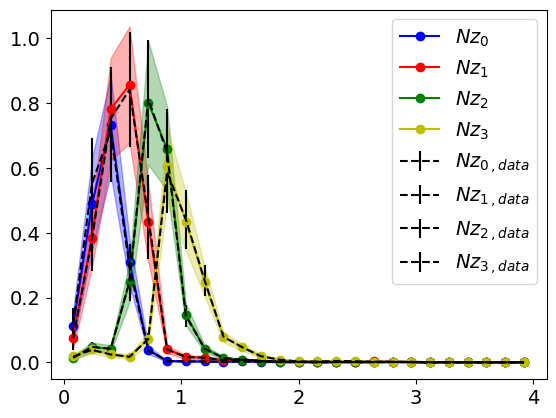

In [25]:
plt.errorbar(Nz0_data["z"], Nz0_data["dndz"], 
             yerr=np.sqrt(Nz0_data["cov"]),
             fmt="k--", label=r"$Nz_{0 \, , data}$")
plt.plot(Nz0_data["z"], Nz_0_m, 'bo-', label=r"$Nz_0$")
plt.fill_between(Nz0_data["z"], Nz_0_m+Nz_0_s, Nz_0_m-Nz_0_s, color='b', alpha=.3)

plt.errorbar(Nz1_data["z"], Nz1_data["dndz"], 
             yerr=np.sqrt(Nz1_data["cov"]),
             fmt="k--", label=r"$Nz_{1 \, , data}$")
plt.plot(Nz1_data["z"], Nz_1_m, 'ro-', label=r"$Nz_1$")
plt.fill_between(Nz1_data["z"], Nz_1_m+Nz_1_s, Nz_1_m-Nz_1_s, color='r', alpha=.3)

plt.errorbar(Nz2_data["z"], Nz2_data["dndz"], 
             yerr=np.sqrt(Nz2_data["cov"]),
             fmt="k--", label=r"$Nz_{2 \, , data}$")
plt.plot(Nz2_data["z"], Nz_2_m, 'go-', label=r"$Nz_2$")
plt.fill_between(Nz2_data["z"], Nz_2_m+Nz_2_s, Nz_2_m-Nz_2_s, color='g', alpha=.3)

plt.errorbar(Nz3_data["z"], Nz3_data["dndz"], 
             yerr=np.sqrt(Nz3_data["cov"]),
             fmt="k--", label=r"$Nz_{3 \, , data}$")
plt.plot(Nz3_data["z"], Nz_3_m, 'yo-', label=r"$Nz_3$")
plt.fill_between(Nz3_data["z"], Nz_3_m+Nz_3_s, Nz_3_m-Nz_3_s, color='y', alpha=.3)

plt.legend();

# GP's

In [140]:
import pyccl as ccl 

In [141]:
gp_z = np.linspace(0, 3, 11)
fid_cosmo = ccl.CosmologyVanillaLCDM()
LCDM_Dz = ccl.growth_factor(fid_cosmo, 1/(1+gp_z))

In [142]:
def add_gps(path):
    gps = []
    i = 1 
    while os.path.isfile(path+"gp_{}.npz".format(i)):
        gp = np.load(path+"gp_{}.npz".format(1))
        gps.append(gp)
        i += 1
    return np.concatenate(gps, 1)

In [143]:
gp_ND = add_gps("../chains/ND_gp_hp_TAP_0.6/")
gp_SD = add_gps("../chains/SD_gp_hp_TAP_0.6/")
gp_DES = add_gps("../chains/DES_full_gp_nos8_2_TAP_0.6/")
gp_ND_RSD = add_gps("../chains/ND_RSD_gp_TAP_0.6/")
gp_DES_RSD = add_gps("../chains/gcgc_gcwl_wlwl_fs8_TAP_0.6/")

In [144]:
def get_m_s(file):
    m = np.mean(file, 1)
    s = np.std(file, 1)
    p65 = np.percentile(file, 65, axis=1)
    p95 = np.percentile(file, 95, axis=1)
    s1 = p65-m
    s2 = p95-m
    return m, s, s1, s2

In [145]:
gp_ND_m, gp_ND_s, gp_ND_s1, gp_ND_s2 = get_m_s(gp_ND)
gp_ND_RSD_m, gp_ND_RSD_s, gp_ND_RSD_s1, gp_ND_RSD_s2 = get_m_s(gp_ND_RSD)
gp_SD_m, gp_SD_s, gp_SD_s1, gp_SD_s2 = get_m_s(gp_SD)
gp_DES_RSD_m, gp_DES_RSD_s, gp_DES_RSD_s1, gp_DES_RSD_s2 = get_m_s(gp_DES_RSD)
gp_DES_m, gp_DES_s, gp_DES_s1, gp_DES_s2 = get_m_s(gp_DES)

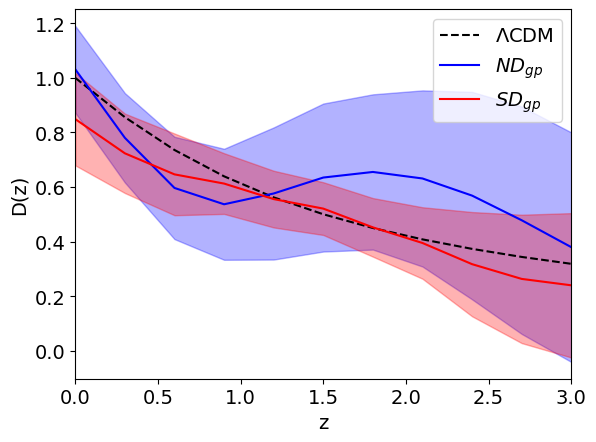

In [146]:
plt.plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, gp_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, gp_ND_m+gp_ND_s, gp_ND_m-gp_ND_s, color='b', alpha=.3)

plt.plot(gp_z, gp_SD_m, 'r-', label=r"$SD_{gp}$")
plt.fill_between(gp_z, gp_SD_m+gp_SD_s, gp_SD_m-gp_SD_s, color='r', alpha=.3)

plt.xlabel("z")
plt.ylabel("D(z)")
plt.xlim(0, 3)
plt.legend()

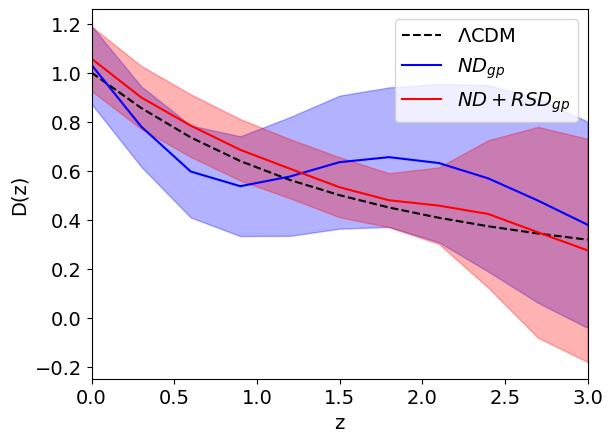

In [147]:
plt.plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, gp_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, gp_ND_m+gp_ND_s, gp_ND_m-gp_ND_s, color='b', alpha=.3)

plt.plot(gp_z, gp_ND_RSD_m, 'r-', label=r"$ND+RSD_{gp}$")
plt.fill_between(gp_z, gp_ND_RSD_m+gp_ND_RSD_s, gp_ND_RSD_m-gp_ND_RSD_s, color='r', alpha=.3)

plt.xlabel("z")
plt.ylabel("D(z)")
plt.xlim(0, 3)
plt.legend()
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/Dz_gp.pdf")

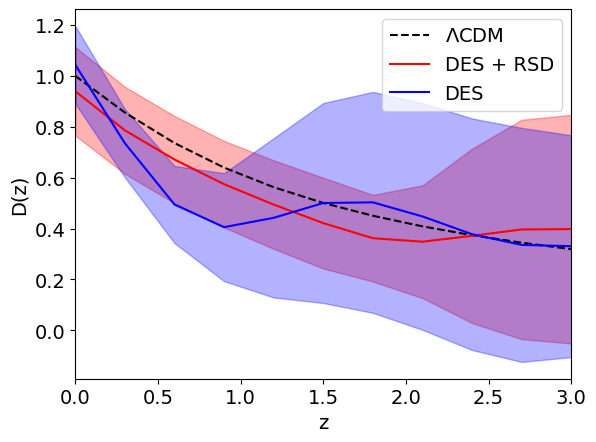

In [148]:
plt.plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, gp_DES_RSD_m, 'r-', label="DES + RSD")
plt.fill_between(gp_z, gp_DES_RSD_m+gp_DES_RSD_s, gp_DES_RSD_m-gp_DES_RSD_s, color='r', alpha=.3)

plt.plot(gp_z, gp_DES_m, 'b-', label="DES")
plt.fill_between(gp_z, gp_DES_m+gp_DES_s, gp_DES_m-gp_DES_s, color='b', alpha=.3)

plt.ylabel("D(z)")
plt.xlabel("z")
plt.xlim(0, 3)
plt.legend()

# S8z

In [149]:
LCDM_S8 = 0.811 * LCDM_Dz/LCDM_Dz[0]

In [150]:
def make_S8(gps, chain):
    Ωms = np.array(chain["Ωm"])
    s8s = [0.811 * gp for gp in np.transpose(gps)]
    S8s = [s8s[i] * np.sqrt(Ωms[i]/0.3) for i in np.arange(len(s8s))]
    return np.transpose(S8s)

In [151]:
S8_ND = make_S8(gp_ND, ND_gp)
S8_SD = make_S8(gp_SD, SD_gp)
S8_DES = make_S8(gp_DES, DES)
S8_DES_RSD = make_S8(gp_DES_RSD, DES_RSD_gp)
S8_ND_RSD = make_S8(gp_ND_RSD, ND_RSD_gp)

In [152]:
S8_ND_m, S8_ND_s, S8_ND_s1, S8_ND_s2 = get_m_s(S8_ND)
S8_SD_m, S8_SD_s, S8_SD_s1, S8_SD_s2 = get_m_s(S8_SD)
S8_DES_m, S8_DES_s, S8_DES_s1, S8_DES_s2 = get_m_s(S8_DES)
S8_DES_RSD_m, S8_DES_RSD_s, S8_DES_RSD_s1, S8_DES_RSD_s2 = get_m_s(S8_DES_RSD)
S8_ND_RSD_m, S8_ND_RSD_s, S8_ND_RSD_s1, S8_ND_RSD_s2 = get_m_s(S8_ND_RSD)

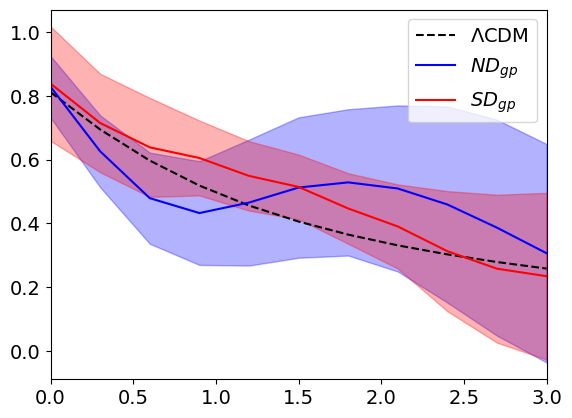

In [153]:
plt.plot(gp_z, LCDM_S8, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, S8_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, S8_ND_m+S8_ND_s, S8_ND_m-S8_ND_s, color='b', alpha=.3)

plt.plot(gp_z, S8_SD_m, 'r-', label=r"$SD_{gp}$")
plt.fill_between(gp_z, S8_SD_m+S8_SD_s, S8_SD_m-S8_SD_s, color='r', alpha=.3)

plt.xlim(0, 3)
plt.legend()

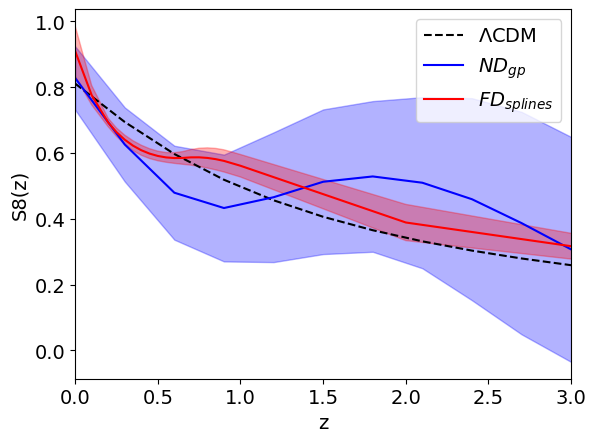

In [177]:
plt.plot(gp_z, LCDM_S8, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, S8_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, S8_ND_m+S8_ND_s, S8_ND_m-S8_ND_s, color='b', alpha=.3)

plt.plot(z_splines, S8_splines_m, 'r-', label=r"$FD_{splines}$")
plt.fill_between(z_splines, S8_splines_m+S8_splines_s, S8_splines_m-S8_splines_s, color='r', alpha=.3)

plt.ylabel("S8(z)")
plt.xlabel("z")
plt.xlim(0, 3)
plt.legend()

plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/splines_vs_gp.pdf")

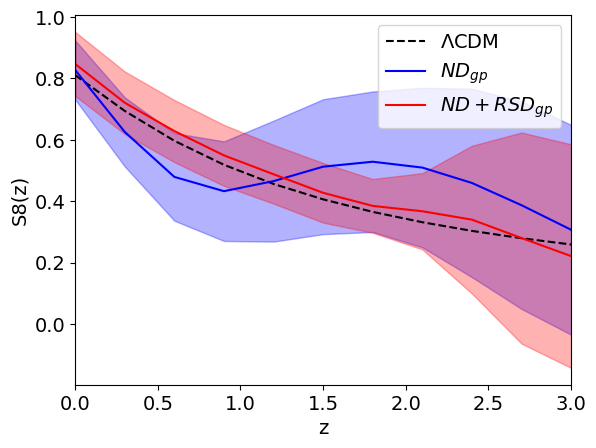

In [165]:
plt.plot(gp_z, LCDM_S8, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, S8_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, S8_ND_m+S8_ND_s, S8_ND_m-S8_ND_s, color='b', alpha=.3)

plt.plot(gp_z, S8_ND_RSD_m, 'r-', label=r"$ND+RSD_{gp}$")
plt.fill_between(gp_z, S8_ND_RSD_m+S8_ND_RSD_s, S8_ND_RSD_m-S8_ND_RSD_s, color='r', alpha=.3)

plt.ylabel("S8(z)")
plt.xlabel("z")
plt.xlim(0, 3)
plt.legend()
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/S8z_gp.pdf")

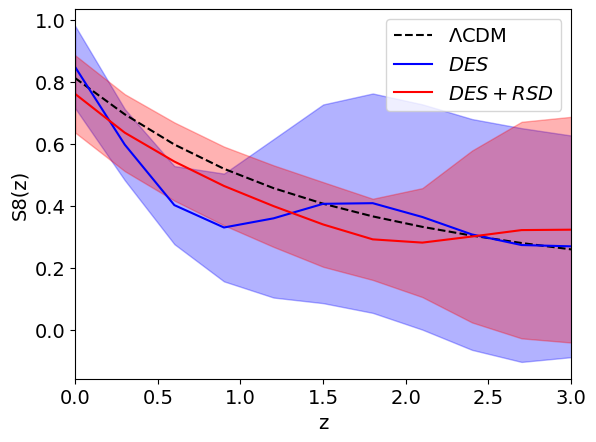

In [156]:
plt.plot(gp_z, LCDM_S8, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, S8_DES_m, 'b-', label=r"$DES$")
plt.fill_between(gp_z, S8_DES_m+S8_DES_s, S8_DES_m-S8_DES_s, color='b', alpha=.3)

plt.plot(gp_z, S8_DES_RSD_m, 'r-', label=r"$DES+RSD$")
plt.fill_between(gp_z, S8_DES_RSD_m+S8_DES_RSD_s, S8_DES_RSD_m-S8_DES_RSD_s, color='r', alpha=.3)

plt.xlim(0, 3)
plt.ylabel("S8(z)")
plt.xlabel("z")
plt.legend()

# fs8

In [172]:
BOSS = np.load("../data/fs8s/BOSS.npz")
eBOSS = np.load("../data/fs8s/eBOSS.npz")
Vipers = np.load("../data/fs8s/Vipers.npz")
sixdF = np.load("../data/fs8s/6dF.npz")
FastSound = np.load("../data/fs8s/FastSound.npz")
Wigglez = np.load("../data/fs8s/Wigglez.npz")

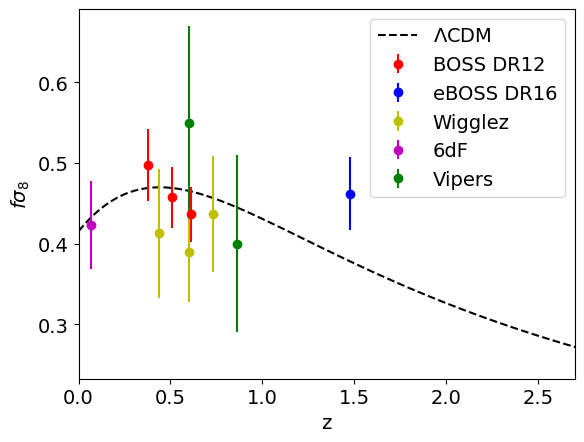

In [175]:
plt.plot(z, LCDM_fs8, 'k--', label=r"$\Lambda$CDM")
plt.errorbar(BOSS['z'], BOSS['data'], yerr=BOSS["err"], fmt='ro', label="BOSS DR12")
plt.errorbar(eBOSS['z'], eBOSS['data'], yerr=eBOSS["err"], fmt='bo', label="eBOSS DR16")
plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez["err"], fmt='yo', label="Wigglez")
plt.errorbar(sixdF['z'], sixdF['data'], yerr=sixdF["err"], fmt='mo', label="6dF")
plt.errorbar(Vipers['z'], Vipers['data'], yerr=Vipers["err"], fmt='go', label="Vipers")
#plt.plot(zs_fid, fs8_m, "b-", label="prior")
#plt.fill_between(zs_fid, fs8_m + fs8_s, fs8_m - fs8_s, color="b", alpha=.3)
plt.legend()
plt.ylabel(r"$f \sigma_8$")
plt.xlabel("z")
plt.xlim(0, 2.7)
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/fs8_data.pdf")

In [158]:
z = np.linspace(0, 3, 100)
LCDM_fs8 = 0.81 * ccl.growth_factor(fid_cosmo, 1/(1+z))*ccl.growth_rate(fid_cosmo, 1/(1+z))

In [159]:
def add_fs8s(path):
    gps = []
    i = 1 
    while os.path.isfile(path+"fs8_{}.npz".format(i)):
        gp = np.load(path+"fs8_{}.npz".format(1))
        gps.append(gp)
        i += 1
    return np.concatenate(gps, 1)

In [160]:
fs8_DES_RSD = add_fs8s("../chains/gcgc_gcwl_wlwl_fs8_TAP_0.6/")
fs8_DES = add_fs8s("../chains/DES_full_gp_nos8_2_TAP_0.6/")
fs8_ND_RSD = add_fs8s("../chains/ND_RSD_gp_TAP_0.6/")

In [161]:
fs8_DES_m, fs8_DES_s, fs8_DES_s1, fs8_DES_s2 = get_m_s(fs8_DES)
fs8_DES_RSD_m, fs8_DES_RSD_s, fs8_DES_RSD_s1, fs8_DES_RSD_s2 = get_m_s(fs8_DES_RSD)
fs8_ND_RSD_m, fs8_ND_RSD_s, fs8_ND_RSD_s1, fs8_ND_RSD_s2 = get_m_s(fs8_ND_RSD)

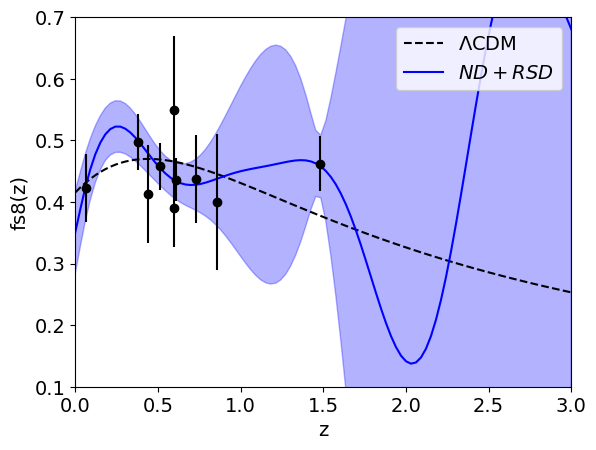

In [166]:
plt.plot(z, LCDM_fs8, 'k--', label=r"$\Lambda$CDM")

#plt.plot(z, fs8_DES_RSD_m, 'r-', label=r"$DES + RSD$")
#plt.fill_between(z, fs8_DES_RSD_m+fs8_DES_RSD_s, fs8_DES_RSD_m-fs8_DES_RSD_s, color='r', alpha=.3)

plt.plot(z, fs8_ND_RSD_m, 'b-', label=r"$ND + RSD$")
plt.fill_between(z, fs8_ND_RSD_m+fs8_ND_RSD_s, fs8_ND_RSD_m-fs8_ND_RSD_s, color='b', alpha=.3)

#plt.plot(z, fs8_DES_m, 'b-', label=r"$DES$")
#plt.fill_between(z, fs8_DES_m+fs8_DES_s, fs8_DES_m-fs8_DES_s, color='b', alpha=.3)

plt.errorbar(BOSS['z'], BOSS['data'], yerr=BOSS["err"], fmt='ko')#, label="BOSS")
plt.errorbar(eBOSS['z'], eBOSS['data'], yerr=eBOSS["err"], fmt='ko')#, label="eBOSS")
plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez["err"], fmt='ko')#, label="Wigglez")
plt.errorbar(sixdF['z'], sixdF['data'], yerr=sixdF["err"], fmt='ko')#, label="6dF")
plt.errorbar(Vipers['z'], Vipers['data'], yerr=Vipers["err"], fmt='ko')#, label="Vipers")

plt.ylabel("fs8(z)")
plt.xlabel("z")
plt.xlim(0, 3)
plt.ylim(0.1, 0.7)
plt.legend(loc='upper right')
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/fs8_gp.pdf")